In [40]:
# Librerías y Dataset

import requests
import pandas as pd
import numpy as np
from io import BytesIO
import re
import seaborn as sns
import matplotlib.pyplot as plt


# Configuración visual
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)

In [41]:

def summary_by_columns(df):
    """
    Generates a summary of each column in the provided DataFrame.

    The summary includes the data type, number of missing values, number of unique values,
    and number of duplicate values for each column.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to summarize.

    Returns
    -------
    pd.DataFrame
        A DataFrame containing the summary information for each column.
    """
    # Create an empty DataFrame to store the summary
    summary_df = pd.DataFrame(
        columns=['Column', 'Data Type', 'Missing Values', 'Unique Values', 'Duplicates'])

    # Loop through each column in the DataFrame
    for col in df.columns:
        data_type = df[col].dtype
        missing_values = df[col].isna().sum()
        num_unique_values = df[col].nunique()
        num_duplicates = df[col].duplicated().sum()

        # Add the results to the summary DataFrame
        row_summary = pd.DataFrame({
            'Column': [col],
            'Data Type': [data_type],
            'Missing Values': [missing_values],
            'Unique Values': [num_unique_values],
            'Duplicates': [num_duplicates],
            'Missing Values (%)': [round((missing_values / df.shape[0]) * 100, 2)]
        })

        # Concatenate the row summary to the summary DataFrame
        summary_df = pd.concat([summary_df, row_summary], ignore_index=True)

    return summary_df

In [42]:
# Importación de Datos
DATA_GITHUB_URL = f'https://raw.githubusercontent.com/DCajiao/Aplicaciones-del-Analisis-Espacial/refs/heads/main/casos/Situación_2/data/output/Accidentes_2009_2010.csv'

df = pd.read_csv(BytesIO(requests.get(DATA_GITHUB_URL).content))
df

,MES FALLECIMIENTO,MES ACCIDENTE,BARRIO,COM,PROFESION,SEXO,EDAD,EDAD AGRUPADA,FECHA ACCIDENTE,FECHA FALLECIMIENTO,HORA FALLECIMIENTO,HORA ACCIDENTE,DIA SEMANA FALLECIMIENTO,DIA SEMANA ACCIDENTE,LUGAR INSP.,CONDICCION,VEHICULOS,Ciudad,coordenada X (metros),coordenada Y (metros),coordenada X (km),coordenada Y (km),AÑO_DATA,TIPO_AUTOMOTOR
0,ENERO,ENERO,NARANJOS,14,NaN,M,18.0,15-19,2009-01-01,2009-01-01,06:00:00,06:00:00,JUEVES,JUEVES,VIA,COND MOTO,MOTO - VOLCAMIENTO,cali,1.066292e+06,872267.143537,1066.291737,872.267144,2009,MOTOCICLETA
1,ENERO,ENERO,SAN PEDRO,11,S.I.,M,40.0,40-44,2009-01-01,2009-01-01,21:00:00,21:00:00,JUEVES,JUEVES,VIA,COND MOTO,MOTO - MICROBUS COOMOEPAL,cali,1.063515e+06,870366.139557,1063.514536,870.366140,2009,MOTOCICLETA
2,ENERO,ENERO,BRISAS DE LOS ALAMOS,2,AUX. MANTENIMIENTO,M,40.0,40-44,2009-01-02,2009-01-02,18:00:00,18:00:00,VIERNES,VIERNES,VIA,CICLISTA,BICICLETA - CAMION,cali,1.063678e+06,877547.614225,1063.677636,877.547614,2009,BICICLETA
3,ENERO,ENERO,VALLE GRANDE,21,MECANICO,M,27.0,25-29,2009-01-04,2009-01-04,00:00:00,00:00:00,DOMINGO,DOMINGO,VIA,COND MOTO,MOTO - TAXI,cali,1.066299e+06,872264.137321,1066.298564,872.264137,2009,MOTOCICLETA
4,ENERO,ENERO,TERRON COLORADO,1,ESTUDIANTE,M,18.0,15-19,2009-01-03,2009-01-03,14:00:00,14:00:00,SABADO,SABADO,VIA,COND MOTO,MOTO - TRACTOCAMION,cali,1.055973e+06,873501.871537,1055.972568,873.501872,2009,MOTOCICLETA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,DICIEMBRE,DICIEMBRE,VALLADO,15,ALBAÑIL,M,53.0,50-54,2010-12-26,2010-12-26,18:00:00,16:40:00,DOMINGO,Domingo,H.U.V.,COND MOTO,MOTO - PEATON,cali,1.064302e+06,868798.427423,1064.301618,868.798427,2010,MOTOCICLETA
585,DICIEMBRE,DICIEMBRE,MELENDEZ,18,DESEMPLADO,M,81.0,80Y+,2010-12-21,2010-12-27,14:30:00,06:40:00,LUNES,Martes,RES. VICTIMA,PEATON,PEATON - CAMPERO,cali,1.059399e+06,865140.241776,1059.398673,865.140242,2010,PEATÓN
586,DICIEMBRE,DICIEMBRE,SAAVEDRA GALINDO,8,DESEMPLADO,M,54.0,50-54,2010-12-28,2010-12-28,10:35:00,10:35:00,MARTES,Martes,VIA,PEATON,PEATON - TAXI EN FUGA,cali,1.062375e+06,872540.023387,1062.374626,872.540023,2010,PEATÓN
587,DICIEMBRE,DICIEMBRE,GRANADA,2,PENSIONADA,F,84.0,80Y+,2010-12-29,2010-12-29,16:46:00,14:00:00,MIERCOLES,Miercoles,CL. REMEDIOS,PEATON,PEATON - AUTO,cali,1.060497e+06,874155.070620,1060.496773,874.155071,2010,PEATÓN


In [43]:
df.columns

Index(['MES FALLECIMIENTO', 'MES ACCIDENTE', 'BARRIO', 'COM', 'PROFESION',
       'SEXO', 'EDAD', 'EDAD AGRUPADA', 'FECHA ACCIDENTE',
       'FECHA FALLECIMIENTO', 'HORA FALLECIMIENTO', 'HORA ACCIDENTE',
       'DIA SEMANA FALLECIMIENTO', 'DIA SEMANA ACCIDENTE', 'LUGAR INSP.',
       'CONDICCION', 'VEHICULOS', 'Ciudad', 'coordenada X (metros)',
       'coordenada Y (metros)', 'coordenada X (km)', 'coordenada Y (km)',
       'AÑO_DATA', 'TIPO_AUTOMOTOR'],
      dtype='object')

In [44]:
df['TIPO_AUTOMOTOR'].unique()

array(['MOTOCICLETA', 'BICICLETA', 'PEATÓN', 'AUTO', 'OTRO', 'CAMIÓN',
       'BUS'], dtype=object)

In [45]:
df.head()

,MES FALLECIMIENTO,MES ACCIDENTE,BARRIO,COM,PROFESION,SEXO,EDAD,EDAD AGRUPADA,FECHA ACCIDENTE,FECHA FALLECIMIENTO,HORA FALLECIMIENTO,HORA ACCIDENTE,DIA SEMANA FALLECIMIENTO,DIA SEMANA ACCIDENTE,LUGAR INSP.,CONDICCION,VEHICULOS,Ciudad,coordenada X (metros),coordenada Y (metros),coordenada X (km),coordenada Y (km),AÑO_DATA,TIPO_AUTOMOTOR
0,ENERO,ENERO,NARANJOS,14,NaN,M,18.0,15-19,2009-01-01,2009-01-01,06:00:00,06:00:00,JUEVES,JUEVES,VIA,COND MOTO,MOTO - VOLCAMIENTO,cali,1.066292e+06,872267.143537,1066.291737,872.267144,2009,MOTOCICLETA
1,ENERO,ENERO,SAN PEDRO,11,S.I.,M,40.0,40-44,2009-01-01,2009-01-01,21:00:00,21:00:00,JUEVES,JUEVES,VIA,COND MOTO,MOTO - MICROBUS COOMOEPAL,cali,1.063515e+06,870366.139557,1063.514536,870.366140,2009,MOTOCICLETA
2,ENERO,ENERO,BRISAS DE LOS ALAMOS,2,AUX. MANTENIMIENTO,M,40.0,40-44,2009-01-02,2009-01-02,18:00:00,18:00:00,VIERNES,VIERNES,VIA,CICLISTA,BICICLETA - CAMION,cali,1.063678e+06,877547.614225,1063.677636,877.547614,2009,BICICLETA
3,ENERO,ENERO,VALLE GRANDE,21,MECANICO,M,27.0,25-29,2009-01-04,2009-01-04,00:00:00,00:00:00,DOMINGO,DOMINGO,VIA,COND MOTO,MOTO - TAXI,cali,1.066299e+06,872264.137321,1066.298564,872.264137,2009,MOTOCICLETA
4,ENERO,ENERO,TERRON COLORADO,1,ESTUDIANTE,M,18.0,15-19,2009-01-03,2009-01-03,14:00:00,14:00:00,SABADO,SABADO,VIA,COND MOTO,MOTO - TRACTOCAMION,cali,1.055973e+06,873501.871537,1055.972568,873.501872,2009,MOTOCICLETA


#### **Planteamiento de gráficas**

In [46]:
# 1. DISTRIBUCIÓN GENERAL: Fallecimientos por Sexo, Edad Agrupada y Tipo de Vehículo
print("=" * 80)
print("ANÁLISIS DE FALLECIMIENTOS EN ACCIDENTES DE TRÁNSITO - CALI")
print("=" * 80)

# Estadísticas básicas
print(f"\nTotal de fallecimientos: {len(df)}")
print(f"\nFallecimientos por Sexo:\n{df['SEXO'].value_counts()}")
print(f"\nFallecimientos por Edad Agrupada:\n{df['EDAD AGRUPADA'].value_counts().sort_index()}")
print(f"\nFallecimientos por Tipo de Vehículo:\n{df['TIPO_AUTOMOTOR'].value_counts()}")



ANÁLISIS DE FALLECIMIENTOS EN ACCIDENTES DE TRÁNSITO - CALI

Total de fallecimientos: 589

Fallecimientos por Sexo:
SEXO
M    476
F    113
Name: count, dtype: int64

Fallecimientos por Edad Agrupada:
EDAD AGRUPADA
0-4       3
10-14     4
15-19    30
20-24    64
25-29    72
30-34    50
35-39    34
40-44    40
45-49    53
5-9       2
50-54    44
55-59    28
60-64    21
65-69    38
70-74    41
75-79    24
80Y+     41
Name: count, dtype: int64

Fallecimientos por Tipo de Vehículo:
TIPO_AUTOMOTOR
MOTOCICLETA    244
PEATÓN         222
BICICLETA       86
AUTO            15
CAMIÓN           9
BUS              7
OTRO             6
Name: count, dtype: int64


ANÁLISIS DE FALLECIMIENTOS EN ACCIDENTES DE TRÁNSITO - CALI

Total de fallecimientos: 589

Fallecimientos por Sexo:
SEXO
M    476
F    113
Name: count, dtype: int64

Fallecimientos por Edad Agrupada:
EDAD AGRUPADA
0-4       3
10-14     4
15-19    30
20-24    64
25-29    72
30-34    50
35-39    34
40-44    40
45-49    53
5-9       2
50-54    44
55-59    28
60-64    21
65-69    38
70-74    41
75-79    24
80Y+     41
Name: count, dtype: int64

Fallecimientos por Tipo de Vehículo:
TIPO_AUTOMOTOR
MOTOCICLETA    244
PEATÓN         222
BICICLETA       86
AUTO            15
CAMIÓN           9
BUS              7
OTRO             6
Name: count, dtype: int64


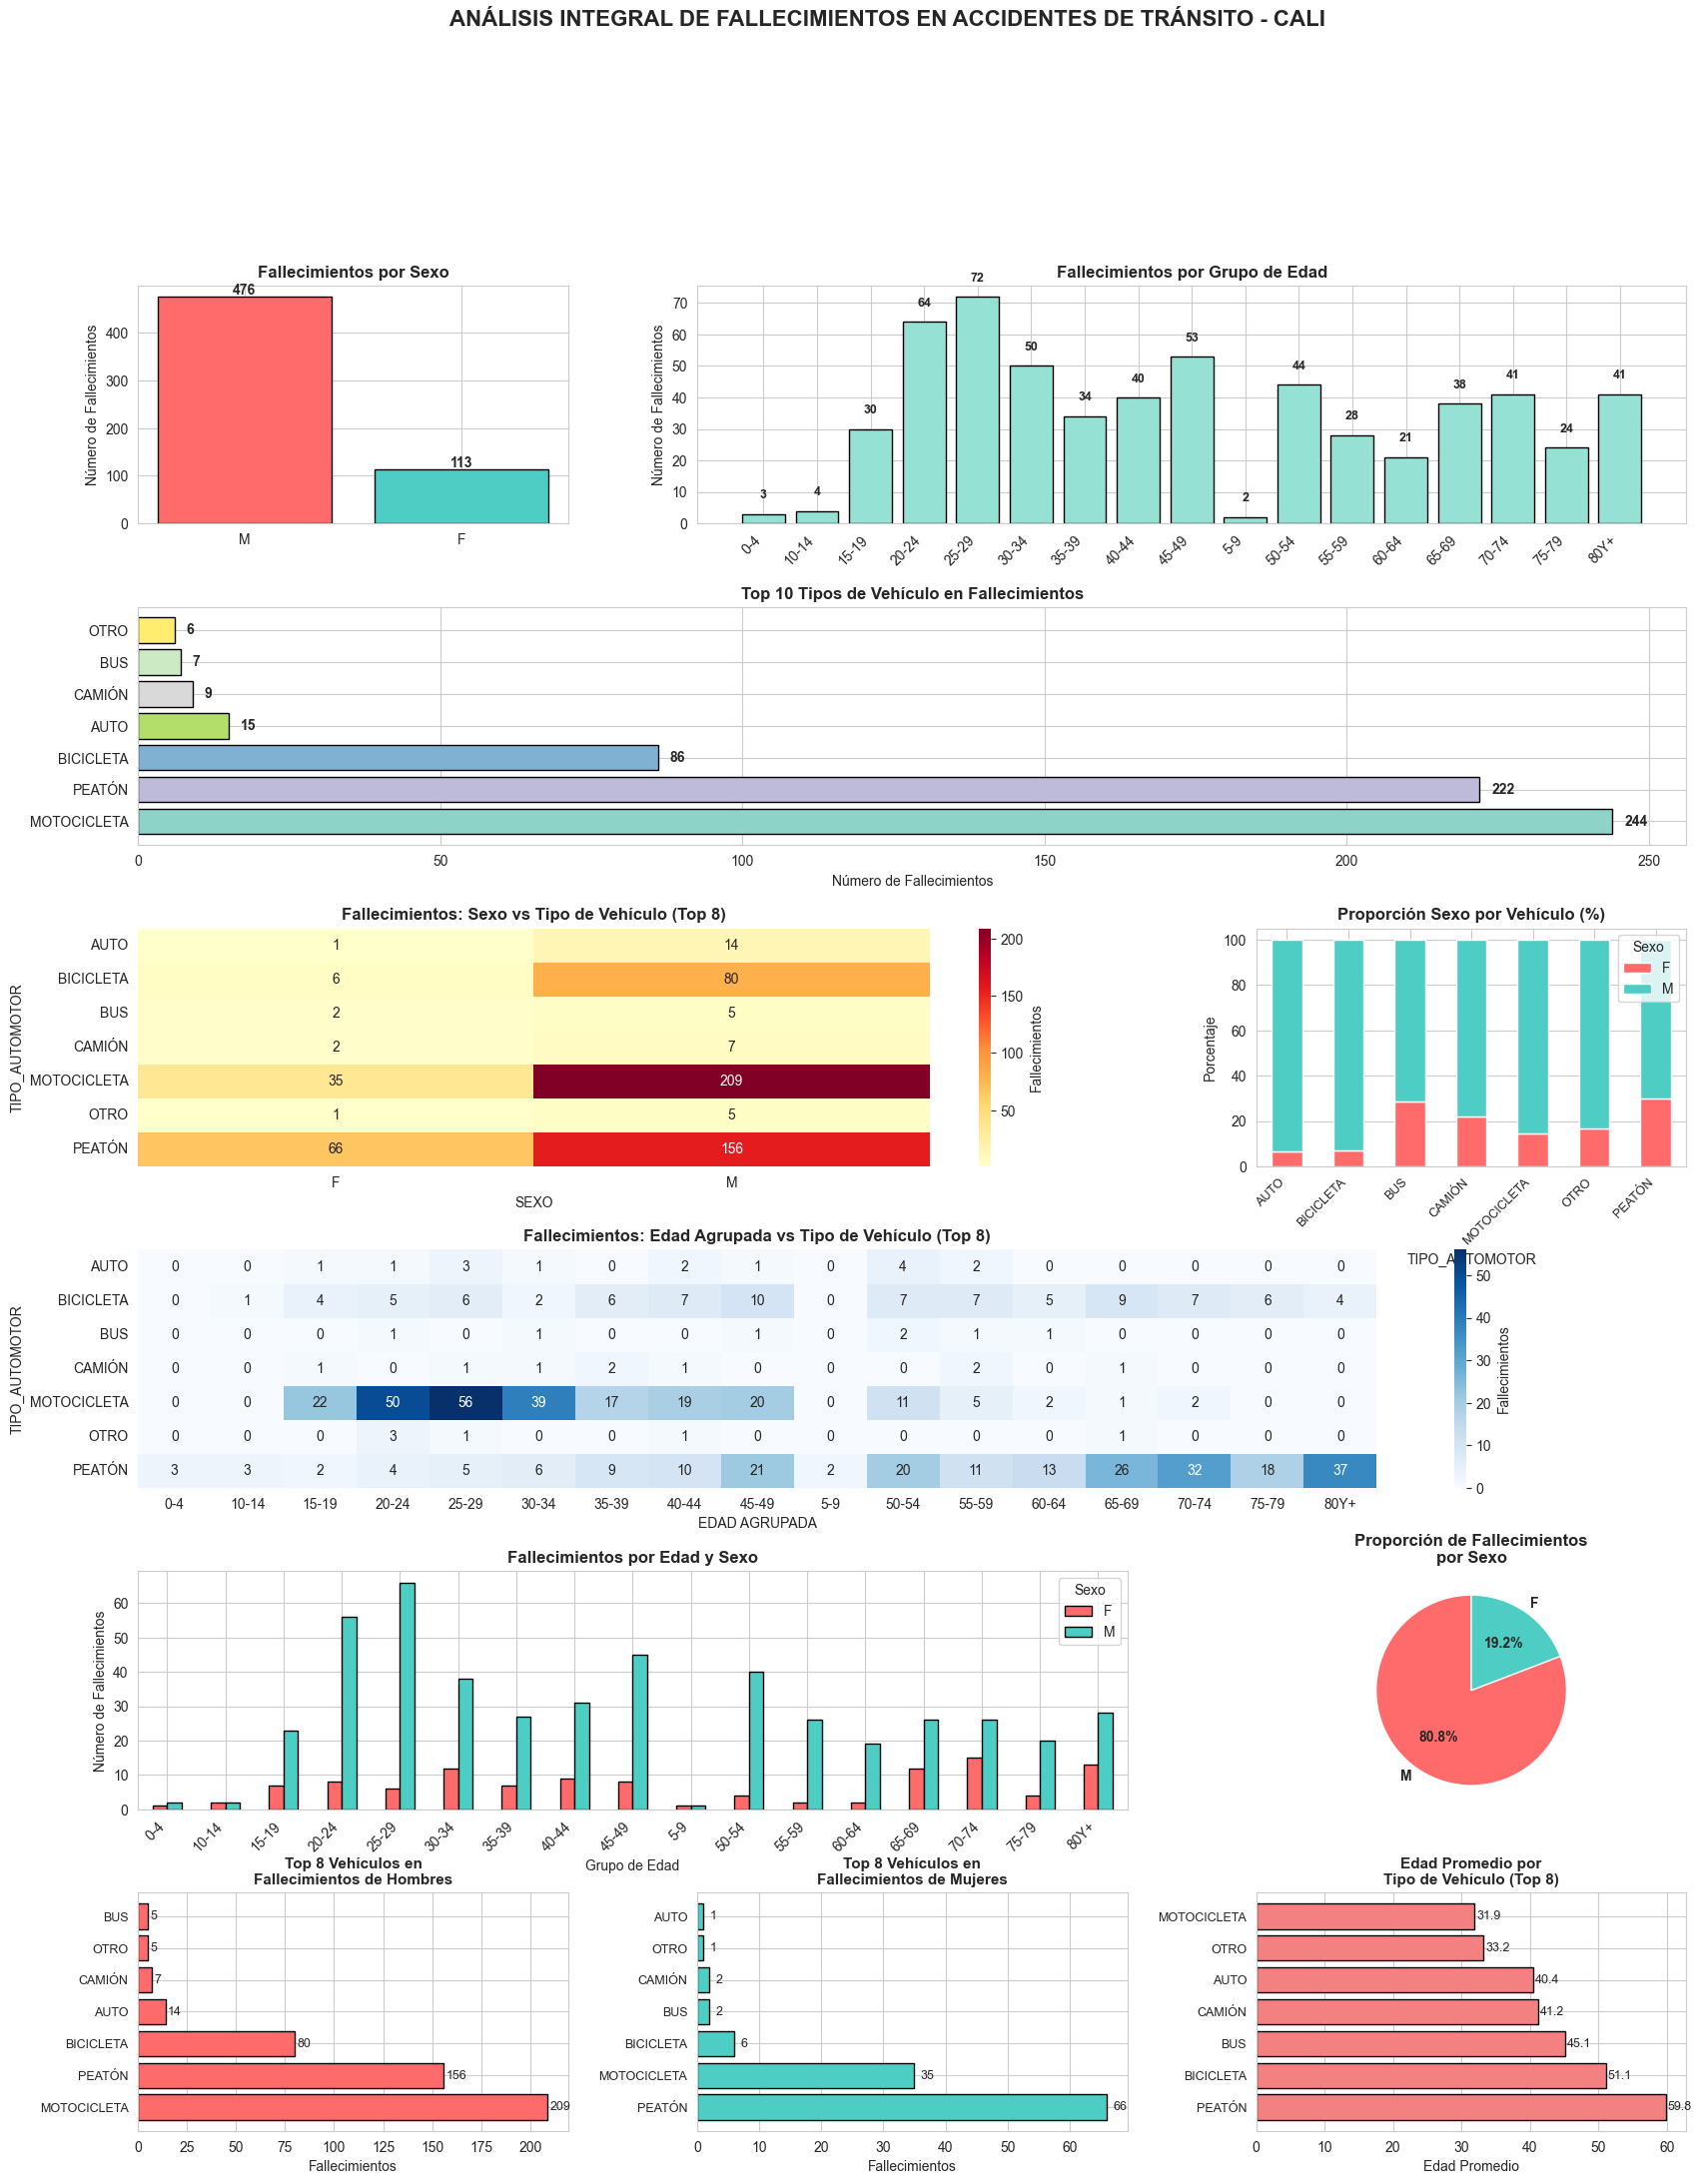


PERFILES DE RIESGO

Top 15 Combinaciones de Mayor Riesgo (Sexo - Edad - Vehículo):
SEXO EDAD AGRUPADA TIPO_AUTOMOTOR  Fallecimientos
   M         25-29    MOTOCICLETA              50
   M         20-24    MOTOCICLETA              44
   M         30-34    MOTOCICLETA              30
   M          80Y+         PEATÓN              24
   M         50-54         PEATÓN              17
   M         45-49    MOTOCICLETA              17
   M         70-74         PEATÓN              17
   M         45-49         PEATÓN              17
   M         15-19    MOTOCICLETA              16
   M         40-44    MOTOCICLETA              16
   M         35-39    MOTOCICLETA              15
   M         65-69         PEATÓN              15
   F         70-74         PEATÓN              15
   M         75-79         PEATÓN              14
   F          80Y+         PEATÓN              13

--------------------------------------------------------------------------------
HOMBRES: 476 fallecimientos (80.8%

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# 1. DISTRIBUCIÓN GENERAL: Fallecimientos por Sexo, Edad Agrupada y Tipo de Vehículo
print("=" * 80)
print("ANÁLISIS DE FALLECIMIENTOS EN ACCIDENTES DE TRÁNSITO - CALI")
print("=" * 80)

# Estadísticas básicas
print(f"\nTotal de fallecimientos: {len(df)}")
print(f"\nFallecimientos por Sexo:\n{df['SEXO'].value_counts()}")
print(f"\nFallecimientos por Edad Agrupada:\n{df['EDAD AGRUPADA'].value_counts().sort_index()}")
print(f"\nFallecimientos por Tipo de Vehículo:\n{df['TIPO_AUTOMOTOR'].value_counts()}")

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 24))
gs = GridSpec(6, 3, figure=fig, hspace=0.35, wspace=0.3)

# 1. Fallecimientos por Sexo
ax1 = fig.add_subplot(gs[0, 0])
sexo_counts = df['SEXO'].value_counts()
colors_sexo = ['#FF6B6B', '#4ECDC4']
ax1.bar(sexo_counts.index, sexo_counts.values, color=colors_sexo, edgecolor='black')
ax1.set_title('Fallecimientos por Sexo', fontsize=12, fontweight='bold')
ax1.set_ylabel('Número de Fallecimientos')
for i, v in enumerate(sexo_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# 2. Fallecimientos por Edad Agrupada
ax2 = fig.add_subplot(gs[0, 1:])
edad_counts = df['EDAD AGRUPADA'].value_counts().sort_index()
ax2.bar(range(len(edad_counts)), edad_counts.values, color='#95E1D3', edgecolor='black')
ax2.set_xticks(range(len(edad_counts)))
ax2.set_xticklabels(edad_counts.index, rotation=45, ha='right')
ax2.set_title('Fallecimientos por Grupo de Edad', fontsize=12, fontweight='bold')
ax2.set_ylabel('Número de Fallecimientos')
for i, v in enumerate(edad_counts.values):
    ax2.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=9)

# 3. Fallecimientos por Tipo de Vehículo
ax3 = fig.add_subplot(gs[1, :])
tipo_counts = df['TIPO_AUTOMOTOR'].value_counts().head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(tipo_counts)))
ax3.barh(range(len(tipo_counts)), tipo_counts.values, color=colors, edgecolor='black')
ax3.set_yticks(range(len(tipo_counts)))
ax3.set_yticklabels(tipo_counts.index)
ax3.set_title('Top 10 Tipos de Vehículo en Fallecimientos', fontsize=12, fontweight='bold')
ax3.set_xlabel('Número de Fallecimientos')
for i, v in enumerate(tipo_counts.values):
    ax3.text(v + 2, i, str(v), va='center', fontweight='bold')

# 4. Heatmap: Sexo vs Tipo de Vehículo (Top 8)
ax4 = fig.add_subplot(gs[2, :2])
top_vehiculos = df['TIPO_AUTOMOTOR'].value_counts().head(8).index
df_filtered = df[df['TIPO_AUTOMOTOR'].isin(top_vehiculos)]
matriz_sexo_tipo = pd.crosstab(df_filtered['TIPO_AUTOMOTOR'], df_filtered['SEXO'])
sns.heatmap(matriz_sexo_tipo, annot=True, fmt='d', cmap='YlOrRd', ax=ax4, cbar_kws={'label': 'Fallecimientos'})
ax4.set_title('Fallecimientos: Sexo vs Tipo de Vehículo (Top 8)', fontsize=12, fontweight='bold')

# 5. Proporción de Sexo por Tipo de Vehículo (Top 8)
ax5 = fig.add_subplot(gs[2, 2])
matriz_prop = matriz_sexo_tipo.div(matriz_sexo_tipo.sum(axis=1), axis=0) * 100
matriz_prop.plot(kind='bar', stacked=True, ax=ax5, color=['#FF6B6B', '#4ECDC4'])
ax5.set_title('Proporción Sexo por Vehículo (%)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Porcentaje')
ax5.legend(title='Sexo', loc='upper right')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right', fontsize=9)

# 6. Heatmap: Edad Agrupada vs Tipo de Vehículo (Top 8)
ax6 = fig.add_subplot(gs[3, :])
matriz_edad_tipo = pd.crosstab(df_filtered['TIPO_AUTOMOTOR'], df_filtered['EDAD AGRUPADA'])
sns.heatmap(matriz_edad_tipo, annot=True, fmt='d', cmap='Blues', ax=ax6, cbar_kws={'label': 'Fallecimientos'})
ax6.set_title('Fallecimientos: Edad Agrupada vs Tipo de Vehículo (Top 8)', fontsize=12, fontweight='bold')

# 7. Sexo vs Edad Agrupada
ax7 = fig.add_subplot(gs[4, 0:2])
matriz_sexo_edad = pd.crosstab(df['EDAD AGRUPADA'], df['SEXO'])
matriz_sexo_edad.plot(kind='bar', ax=ax7, color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
ax7.set_title('Fallecimientos por Edad y Sexo', fontsize=12, fontweight='bold')
ax7.set_ylabel('Número de Fallecimientos')
ax7.set_xlabel('Grupo de Edad')
ax7.legend(title='Sexo')
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, ha='right')

# 8. Distribución por Sexo - Pastel
ax8 = fig.add_subplot(gs[4, 2])
sexo_pct = df['SEXO'].value_counts()
ax8.pie(sexo_pct.values, labels=sexo_pct.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4'], startangle=90, textprops={'fontweight': 'bold'})
ax8.set_title('Proporción de Fallecimientos\npor Sexo', fontsize=12, fontweight='bold')

# 9. Top Vehículos por Sexo - Hombre
ax9 = fig.add_subplot(gs[5, 0])
df_hombre = df[df['SEXO'] == 'M']
top_vehiculos_h = df_hombre['TIPO_AUTOMOTOR'].value_counts().head(8)
ax9.barh(range(len(top_vehiculos_h)), top_vehiculos_h.values, color='#FF6B6B', edgecolor='black')
ax9.set_yticks(range(len(top_vehiculos_h)))
ax9.set_yticklabels(top_vehiculos_h.index, fontsize=9)
ax9.set_title('Top 8 Vehículos en\nFallecimientos de Hombres', fontsize=11, fontweight='bold')
ax9.set_xlabel('Fallecimientos')
for i, v in enumerate(top_vehiculos_h.values):
    ax9.text(v + 1, i, str(v), va='center', fontsize=9)

# 10. Top Vehículos por Sexo - Mujer
ax10 = fig.add_subplot(gs[5, 1])
df_mujer = df[df['SEXO'] == 'F']
top_vehiculos_m = df_mujer['TIPO_AUTOMOTOR'].value_counts().head(8)
ax10.barh(range(len(top_vehiculos_m)), top_vehiculos_m.values, color='#4ECDC4', edgecolor='black')
ax10.set_yticks(range(len(top_vehiculos_m)))
ax10.set_yticklabels(top_vehiculos_m.index, fontsize=9)
ax10.set_title('Top 8 Vehículos en\nFallecimientos de Mujeres', fontsize=11, fontweight='bold')
ax10.set_xlabel('Fallecimientos')
for i, v in enumerate(top_vehiculos_m.values):
    ax10.text(v + 1, i, str(v), va='center', fontsize=9)

# 11. Edad promedio por Tipo de Vehículo (Top 8)
ax11 = fig.add_subplot(gs[5, 2])
edad_numerica = pd.to_numeric(df['EDAD'], errors='coerce')
df_temp = df_filtered.copy()
df_temp['EDAD_NUM'] = edad_numerica
edad_prom = df_temp.groupby('TIPO_AUTOMOTOR')['EDAD_NUM'].mean().sort_values(ascending=False)
ax11.barh(range(len(edad_prom)), edad_prom.values, color='#F38181', edgecolor='black')
ax11.set_yticks(range(len(edad_prom)))
ax11.set_yticklabels(edad_prom.index, fontsize=9)
ax11.set_title('Edad Promedio por\nTipo de Vehículo (Top 8)', fontsize=11, fontweight='bold')
ax11.set_xlabel('Edad Promedio')
for i, v in enumerate(edad_prom.values):
    ax11.text(v + 0.3, i, f'{v:.1f}', va='center', fontsize=9)

plt.suptitle('ANÁLISIS INTEGRAL DE FALLECIMIENTOS EN ACCIDENTES DE TRÁNSITO - CALI', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('analisis_fallecimientos_cali.png', dpi=300, bbox_inches='tight')
plt.show()

# ANÁLISIS ADICIONAL: Perfiles de Riesgo
print("\n" + "=" * 80)
print("PERFILES DE RIESGO")
print("=" * 80)

# Crear tabla de análisis cruzado
analisis_cruzado = df.groupby(['SEXO', 'EDAD AGRUPADA', 'TIPO_AUTOMOTOR']).size().reset_index(name='Fallecimientos')
analisis_cruzado = analisis_cruzado.sort_values('Fallecimientos', ascending=False)

print("\nTop 15 Combinaciones de Mayor Riesgo (Sexo - Edad - Vehículo):")
print(analisis_cruzado.head(15).to_string(index=False))

# Análisis por sexo
print("\n" + "-" * 80)
print(f"HOMBRES: {len(df_hombre)} fallecimientos ({len(df_hombre)/len(df)*100:.1f}%)")
print(f"Edad promedio: {edad_numerica[df['SEXO']=='M'].mean():.1f} años")
print(f"Vehículo más frecuente: {df_hombre['TIPO_AUTOMOTOR'].value_counts().index[0]}")

print("\n" + "-" * 80)
print(f"MUJERES: {len(df_mujer)} fallecimientos ({len(df_mujer)/len(df)*100:.1f}%)")
print(f"Edad promedio: {edad_numerica[df['SEXO']=='F'].mean():.1f} años")
print(f"Vehículo más frecuente: {df_mujer['TIPO_AUTOMOTOR'].value_counts().index[0]}")

In [48]:
df['DIA SEMANA ACCIDENTE']

0         JUEVES
1         JUEVES
2        VIERNES
3        DOMINGO
4         SABADO
         ...    
584      Domingo
585       Martes
586       Martes
587    Miercoles
588        Lunes
Name: DIA SEMANA ACCIDENTE, Length: 589, dtype: object

In [49]:
# renombrar columna TIPO_AUTOMOTOR a TIPO AUTOMOTOR
df.rename(columns={'TIPO_AUTOMOTOR': 'TIPO AUTOMOTOR'}, inplace=True)

In [50]:
# Preparar datos
df['FECHA ACCIDENTE'] = pd.to_datetime(df['FECHA ACCIDENTE'], errors='coerce')
df['AÑO'] = df['FECHA ACCIDENTE'].dt.year
df['HORA ACCIDENTE'] = pd.to_numeric(df['HORA ACCIDENTE'].str.split(':').str[0], errors='coerce')

# Estandarizar día de semana
df['DIA SEMANA ACCIDENTE'] = df['DIA SEMANA ACCIDENTE'].str.lower().str.capitalize()

# Mapeo de meses en español a número
meses_numero = {
    'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4, 'MAYO': 5, 'JUNIO': 6,
    'JULIO': 7, 'AGOSTO': 8, 'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12
}

# Crear columna de número de mes
df['MES NUMERO'] = df['MES ACCIDENTE'].map(meses_numero)

# Crear rango de hora
def asignar_rango_hora(hora):
    if pd.isna(hora):
        return 'Sin dato'
    elif 0 <= hora < 6:
        return '00:00 - 05:59'
    elif 6 <= hora < 12:
        return '06:00 - 11:59'
    elif 12 <= hora < 18:
        return '12:00 - 17:59'
    else:
        return '18:00 - 23:59'

df['RANGO HORA'] = df['HORA ACCIDENTE'].apply(asignar_rango_hora)

print("=" * 80)
print("ANÁLISIS DE ACCIDENTES EN CALI 2009-2010")
print("=" * 80)
print(f"Total de accidentes: {len(df)}")
print(f"Años cubiertos: {sorted(df['AÑO'].unique())}")
print(f"Tipos de vehículos: {sorted(df['TIPO AUTOMOTOR'].unique())}")

ANÁLISIS DE ACCIDENTES EN CALI 2009-2010
Total de accidentes: 589
Años cubiertos: [np.int32(2009), np.int32(2010)]
Tipos de vehículos: ['AUTO', 'BICICLETA', 'BUS', 'CAMIÓN', 'MOTOCICLETA', 'OTRO', 'PEATÓN']


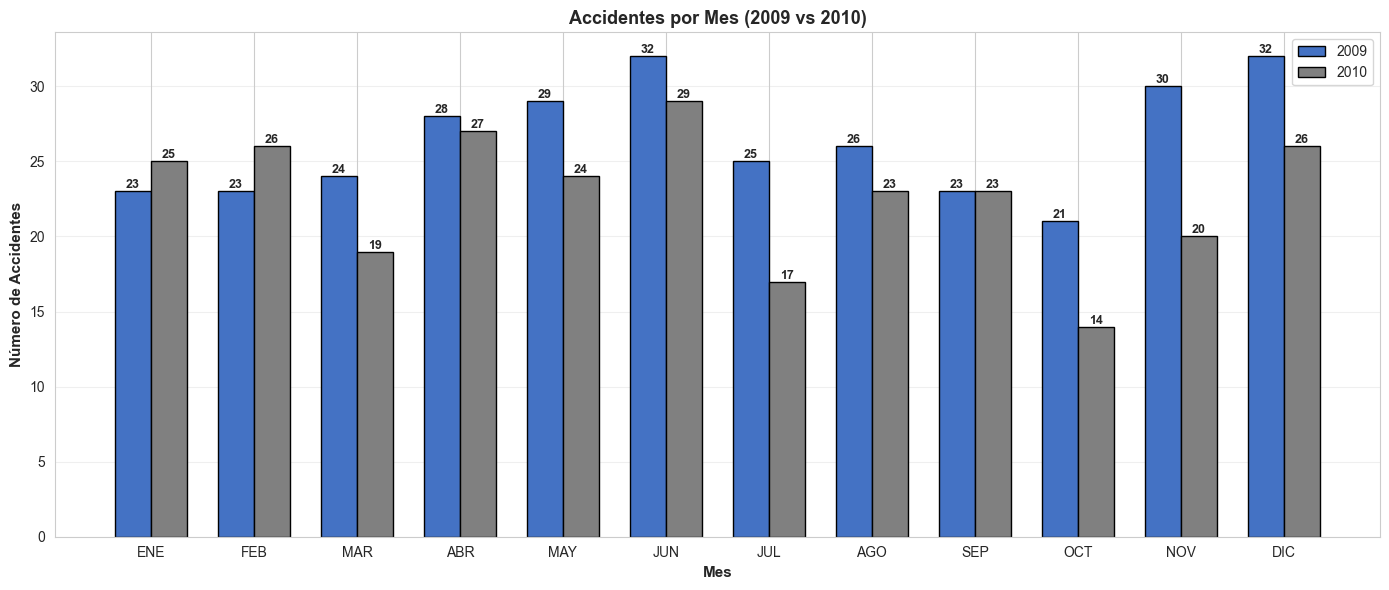

In [51]:
# Comparativa por mes (2009 vs 2010)

fig1, ax1 = plt.subplots(figsize=(14, 6))

accidentes_por_mes = df.groupby(['AÑO', 'MES ACCIDENTE', 'MES NUMERO']).size().reset_index(name='Accidentes')
accidentes_por_mes = accidentes_por_mes.sort_values('MES NUMERO')

accidentes_2009 = accidentes_por_mes[accidentes_por_mes['AÑO'] == 2009]
accidentes_2010 = accidentes_por_mes[accidentes_por_mes['AÑO'] == 2010]

x = np.arange(len(accidentes_2009))
width = 0.35

bars1 = ax1.bar(x - width/2, accidentes_2009['Accidentes'].values, width, 
                label='2009', color='#4472C4', edgecolor='black')
bars2 = ax1.bar(x + width/2, accidentes_2010['Accidentes'].values, width, 
                label='2010', color='#808080', edgecolor='black')

ax1.set_xlabel('Mes', fontsize=11, fontweight='bold')
ax1.set_ylabel('Número de Accidentes', fontsize=11, fontweight='bold')
ax1.set_title('Accidentes por Mes (2009 vs 2010)', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([m[:3] for m in accidentes_2009['MES ACCIDENTE'].values])
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('imagen1_accidentes_por_mes.png', dpi=300, bbox_inches='tight')
plt.show()

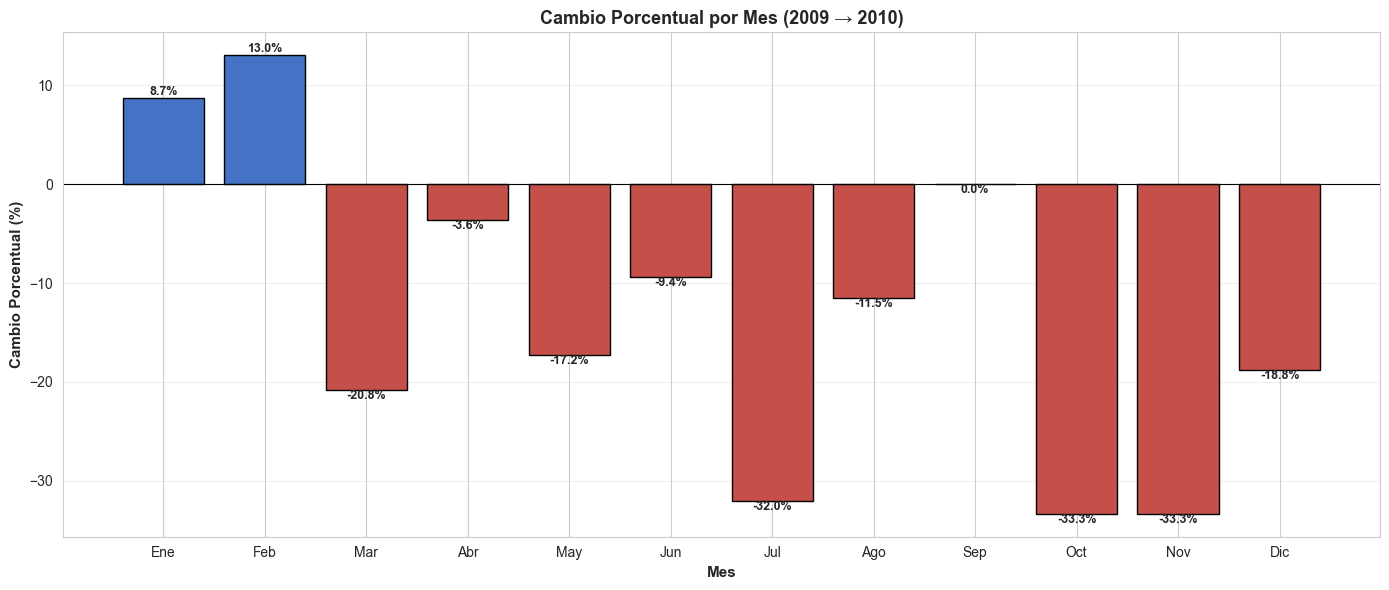

In [53]:
# IMAGEN 2: Cambio porcentual por mes (2009 → 2010)
fig2, ax2 = plt.subplots(figsize=(14, 6))

# Crear tabla pivote
pivot_table = accidentes_por_mes.pivot_table(index='MES NUMERO', columns='AÑO', values='Accidentes', aggfunc='sum')
cambio_pct = ((pivot_table[2010] - pivot_table[2009]) / pivot_table[2009] * 100).fillna(0)

meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
cambio_valores = cambio_pct.values
colores = ['#4472C4' if x > 0 else '#C5504A' for x in cambio_valores]

bars = ax2.bar(range(len(cambio_valores)), cambio_valores, color=colores, edgecolor='black')

ax2.set_xlabel('Mes', fontsize=11, fontweight='bold')
ax2.set_ylabel('Cambio Porcentual (%)', fontsize=11, fontweight='bold')
ax2.set_title('Cambio Porcentual por Mes (2009 → 2010)', fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(meses_nombres)))
ax2.set_xticklabels(meses_nombres)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(axis='y', alpha=0.3)

# Agregar valores
for i, (bar, val) in enumerate(zip(bars, cambio_valores)):
    ax2.text(bar.get_x() + bar.get_width()/2., val,
            f'{val:.1f}%', ha='center', va='bottom' if val > 0 else 'top', 
            fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('imagen2_cambio_porcentual.png', dpi=300, bbox_inches='tight')
plt.show()

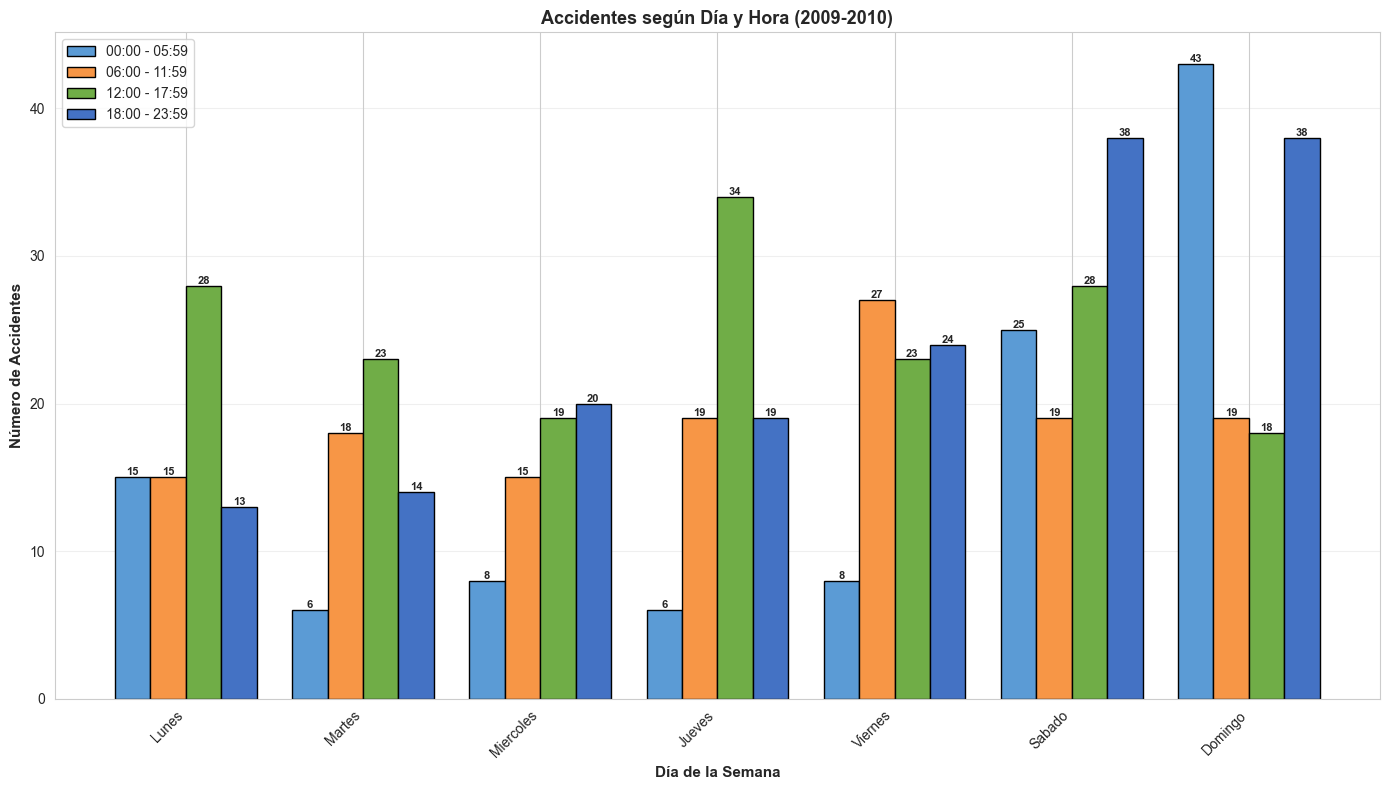

In [71]:
# IMAGEN 3: Siniestralidad por día y hora

fig3, ax3 = plt.subplots(figsize=(14, 8))

accidentes_dia_rango = df.groupby(['DIA SEMANA ACCIDENTE', 'RANGO HORA']).size().reset_index(name='Accidentes')

# Pivot para crear matriz
matriz_dia_hora = accidentes_dia_rango.pivot(index='DIA SEMANA ACCIDENTE', columns='RANGO HORA', values='Accidentes').fillna(0)

# Reordenar días
dias_es_orden = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
matriz_dia_hora = matriz_dia_hora.reindex(dias_es_orden)

# Reordenar columnas
columnas_orden = ['00:00 - 05:59', '06:00 - 11:59', '12:00 - 17:59', '18:00 - 23:59', 'Sin dato']
matriz_dia_hora = matriz_dia_hora[[col for col in columnas_orden if col in matriz_dia_hora.columns]]

colores_horas = ['#5B9BD5', '#F79646', '#70AD47', '#4472C4']
x = np.arange(len(matriz_dia_hora.index))
width = 0.2

for i, columna in enumerate(matriz_dia_hora.columns):
    if columna != 'Sin dato':
        offset = width * (i - 1.5)
        bars = ax3.bar(x + offset, matriz_dia_hora[columna], width, 
                      label=columna, color=colores_horas[i % len(colores_horas)], edgecolor='black')
        
        # Agregar valores
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax3.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold')

ax3.set_xlabel('Día de la Semana', fontsize=11, fontweight='bold')
ax3.set_ylabel('Número de Accidentes', fontsize=11, fontweight='bold')
ax3.set_title('Accidentes según Día y Hora (2009-2010)', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(matriz_dia_hora.index, rotation=45, ha='right')
ax3.legend(fontsize=10, loc='upper left')
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('imagen3_dia_hora.png', dpi=300, bbox_inches='tight')
plt.show()

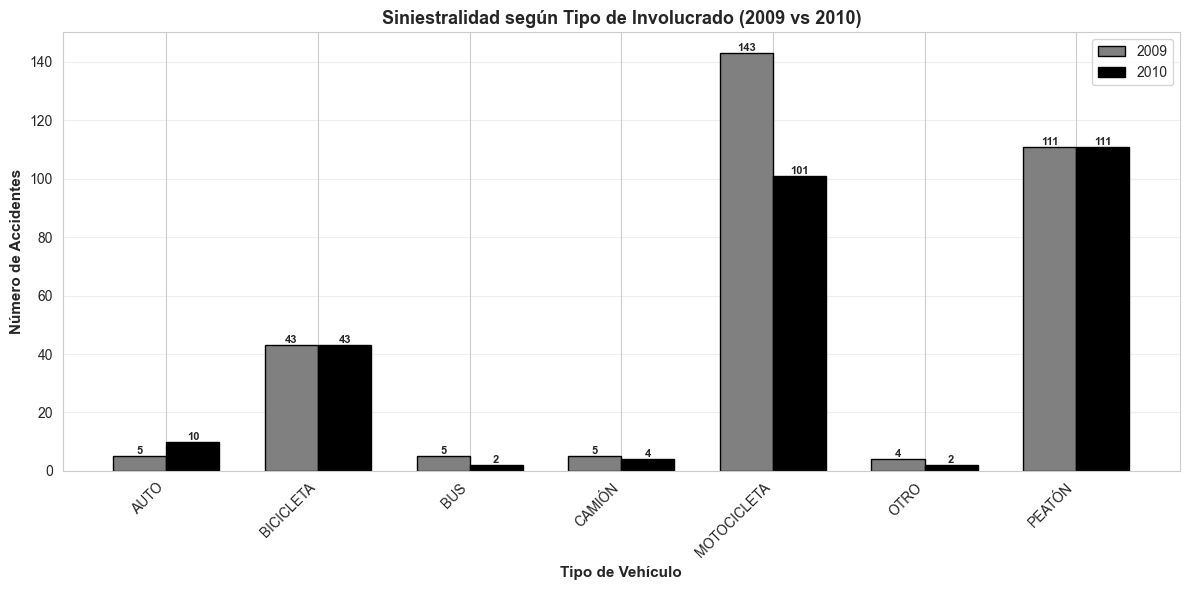

In [55]:
# IMAGEN 4: Siniestralidad por tipo de involucrado (TIPO AUTOMOTOR)
fig4, ax4 = plt.subplots(figsize=(12, 6))

accidentes_tipo = df.groupby(['AÑO', 'TIPO AUTOMOTOR']).size().reset_index(name='Accidentes')

todos_tipos = sorted(df['TIPO AUTOMOTOR'].unique())
x = np.arange(len(todos_tipos))
width = 0.35

valores_2009 = [accidentes_tipo[(accidentes_tipo['AÑO'] == 2009) & (accidentes_tipo['TIPO AUTOMOTOR'] == t)]['Accidentes'].values
                for t in todos_tipos]
valores_2009 = [v[0] if len(v) > 0 else 0 for v in valores_2009]

valores_2010 = [accidentes_tipo[(accidentes_tipo['AÑO'] == 2010) & (accidentes_tipo['TIPO AUTOMOTOR'] == t)]['Accidentes'].values
                for t in todos_tipos]
valores_2010 = [v[0] if len(v) > 0 else 0 for v in valores_2010]

bars1 = ax4.bar(x - width/2, valores_2009, width, label='2009', color='#808080', edgecolor='black')
bars2 = ax4.bar(x + width/2, valores_2010, width, label='2010', color='#000000', edgecolor='black')

ax4.set_xlabel('Tipo de Vehículo', fontsize=11, fontweight='bold')
ax4.set_ylabel('Número de Accidentes', fontsize=11, fontweight='bold')
ax4.set_title('Siniestralidad según Tipo de Involucrado (2009 vs 2010)', fontsize=13, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(todos_tipos, rotation=45, ha='right')
ax4.legend(fontsize=10)
ax4.grid(axis='y', alpha=0.3)

# Agregar valores
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax4.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('imagen4_tipo_automotor.png', dpi=300, bbox_inches='tight')
plt.show()

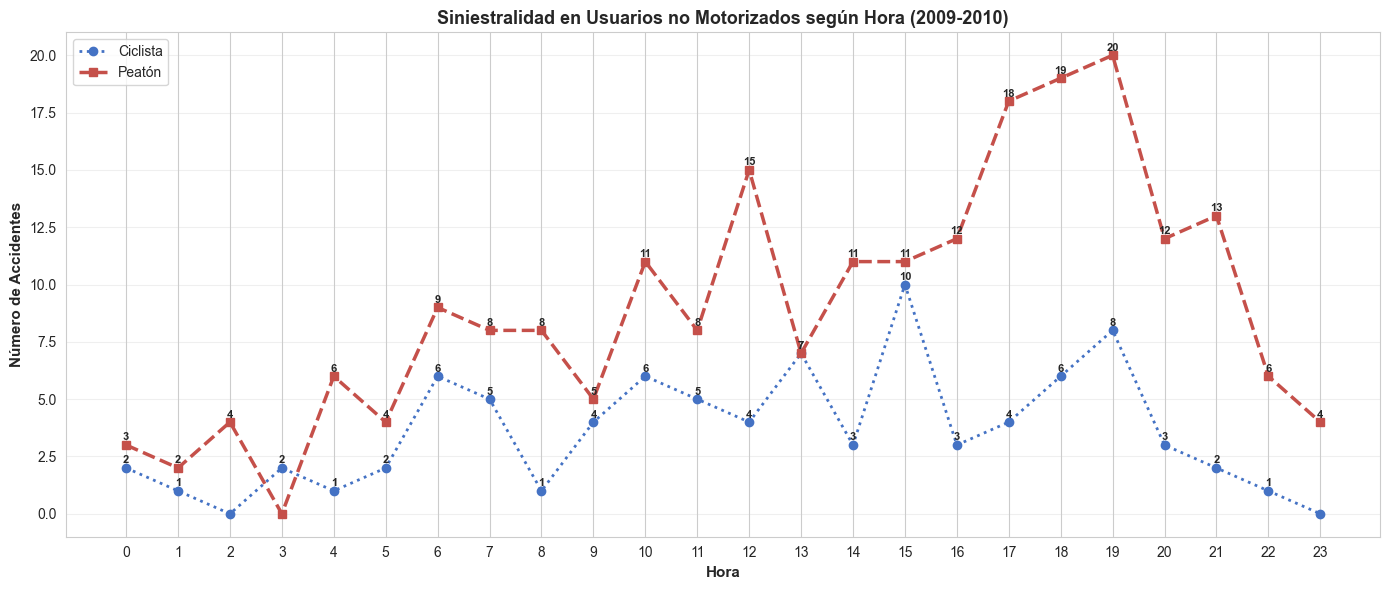

In [56]:
# IMAGEN 5: Usuarios no motorizados por hora (BICICLETA, PEATÓN)
fig5, ax5 = plt.subplots(figsize=(14, 6))

df_no_motorizados = df[df['TIPO AUTOMOTOR'].isin(['BICICLETA', 'PEATÓN'])]
accidentes_no_mot = df_no_motorizados.groupby(['TIPO AUTOMOTOR', 'HORA ACCIDENTE']).size().reset_index(name='Accidentes')

horas_completas = range(0, 24)
for tipo in ['BICICLETA', 'PEATÓN']:
    datos_tipo = accidentes_no_mot[accidentes_no_mot['TIPO AUTOMOTOR'] == tipo]
    valores = [datos_tipo[datos_tipo['HORA ACCIDENTE'] == h]['Accidentes'].values[0] 
               if len(datos_tipo[datos_tipo['HORA ACCIDENTE'] == h]) > 0 else 0 for h in horas_completas]
    
    if tipo == 'BICICLETA':
        ax5.plot(horas_completas, valores, marker='o', linestyle=':', linewidth=2, 
                markersize=6, label='Ciclista', color='#4472C4')
        # Agregar valores
        for h, v in zip(horas_completas, valores):
            if v > 0:
                ax5.text(h, v + 0.2, f'{int(v)}', ha='center', fontsize=8, fontweight='bold')
    else:
        ax5.plot(horas_completas, valores, marker='s', linestyle='--', linewidth=2.5, 
                markersize=6, label='Peatón', color='#C5504A')
        # Agregar valores
        for h, v in zip(horas_completas, valores):
            if v > 0:
                ax5.text(h, v + 0.2, f'{int(v)}', ha='center', fontsize=8, fontweight='bold')

ax5.set_xlabel('Hora', fontsize=11, fontweight='bold')
ax5.set_ylabel('Número de Accidentes', fontsize=11, fontweight='bold')
ax5.set_title('Siniestralidad en Usuarios no Motorizados según Hora (2009-2010)', fontsize=13, fontweight='bold')
ax5.set_xticks(range(0, 24))
ax5.legend(fontsize=10, loc='upper left')
ax5.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('imagen5_usuarios_no_motorizados.png', dpi=300, bbox_inches='tight')
plt.show()

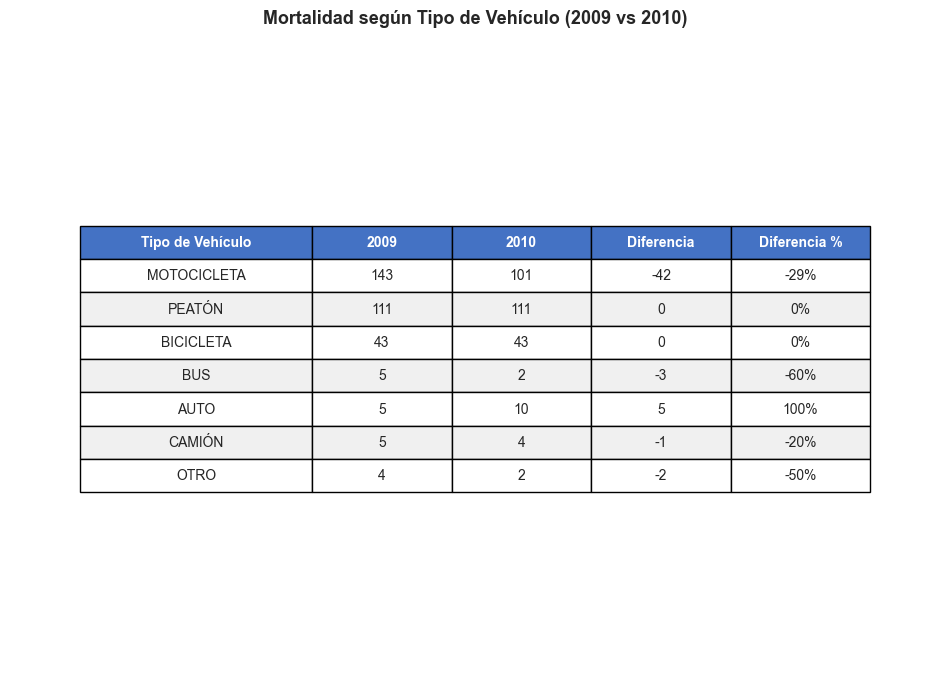

In [57]:
# IMAGEN 6: Mortalidad por tipo de vehículo

fig6, ax6 = plt.subplots(figsize=(12, 8))

# Agrupar por tipo de automotor y año
mortalidad_tipo = df.groupby(['AÑO', 'TIPO AUTOMOTOR']).size().reset_index(name='Fallecidos')

# Crear tabla para comparación
mortalidad_pivot = mortalidad_tipo.pivot(index='TIPO AUTOMOTOR', columns='AÑO', values='Fallecidos').fillna(0)
mortalidad_pivot['Diferencia'] = mortalidad_pivot[2010] - mortalidad_pivot[2009]
mortalidad_pivot['Diferencia %'] = (mortalidad_pivot['Diferencia'] / mortalidad_pivot[2009] * 100).replace([np.inf, -np.inf], 0)
mortalidad_pivot = mortalidad_pivot.sort_values(2009, ascending=False)

# Crear tabla para visualizar
tabla_data = []
for idx in mortalidad_pivot.index:
    tabla_data.append([
        idx,
        int(mortalidad_pivot.loc[idx, 2009]),
        int(mortalidad_pivot.loc[idx, 2010]),
        int(mortalidad_pivot.loc[idx, 'Diferencia']),
        f"{mortalidad_pivot.loc[idx, 'Diferencia %']:.0f}%"
    ])

ax6.axis('tight')
ax6.axis('off')

tabla = ax6.table(cellText=tabla_data, 
                 colLabels=['Tipo de Vehículo', '2009', '2010', 'Diferencia', 'Diferencia %'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.25, 0.15, 0.15, 0.15, 0.15])

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 2)

# Estilo header
for i in range(5):
    tabla[(0, i)].set_facecolor('#4472C4')
    tabla[(0, i)].set_text_props(weight='bold', color='white')

# Colores alternados en filas
for i in range(1, len(tabla_data) + 1):
    for j in range(5):
        if i % 2 == 0:
            tabla[(i, j)].set_facecolor('#F0F0F0')
        else:
            tabla[(i, j)].set_facecolor('white')

plt.title('Mortalidad según Tipo de Vehículo (2009 vs 2010)', 
         fontsize=13, fontweight='bold', pad=20)

plt.savefig('imagen6_mortalidad_tipo_vehiculo.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
df['RANGO HORA']

0      06:00 - 11:59
1      18:00 - 23:59
2      18:00 - 23:59
3      00:00 - 05:59
4      12:00 - 17:59
           ...      
584    12:00 - 17:59
585    06:00 - 11:59
586    06:00 - 11:59
587    12:00 - 17:59
588    12:00 - 17:59
Name: RANGO HORA, Length: 589, dtype: object


Generando Gráfica 1: Sexo × Tipo Automotor × Hora...


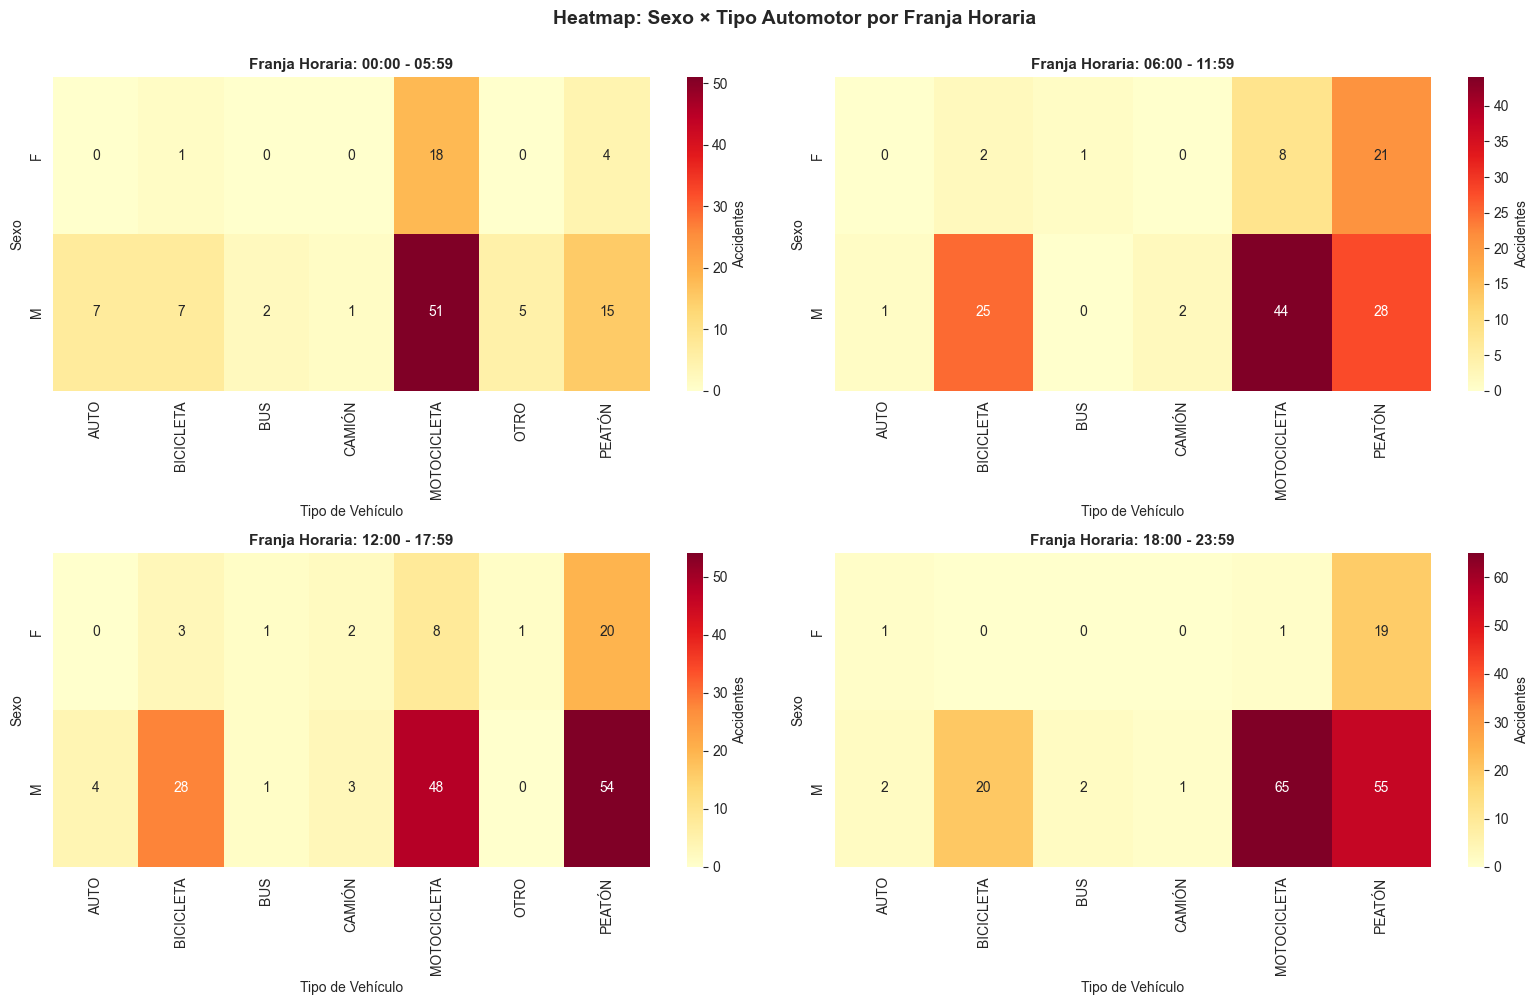

In [59]:
# ============================================================================
# GRÁFICA 1: Heatmap - Sexo × Tipo Automotor × Hora (facetas por rango hora)
# ============================================================================
print("\nGenerando Gráfica 1: Sexo × Tipo Automotor × Hora...")
fig1 = plt.figure(figsize=(16, 10))

rangos = ['00:00 - 05:59', '06:00 - 11:59', '12:00 - 17:59', '18:00 - 23:59']
for idx, rango in enumerate(rangos, 1):
    ax = fig1.add_subplot(2, 2, idx)
    df_rango = df[df['RANGO HORA'] == rango]
    
    matriz = pd.crosstab(df_rango['SEXO'], df_rango['TIPO AUTOMOTOR'])
    sns.heatmap(matriz, annot=True, fmt='d', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Accidentes'})
    ax.set_title(f'Franja Horaria: {rango}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Tipo de Vehículo')
    ax.set_ylabel('Sexo')

plt.suptitle('Heatmap: Sexo × Tipo Automotor por Franja Horaria', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('grafica1_sexo_tipo_hora.png', dpi=300, bbox_inches='tight')
plt.show()



Generando Gráfica 1: Sexo × Tipo Automotor × Año...


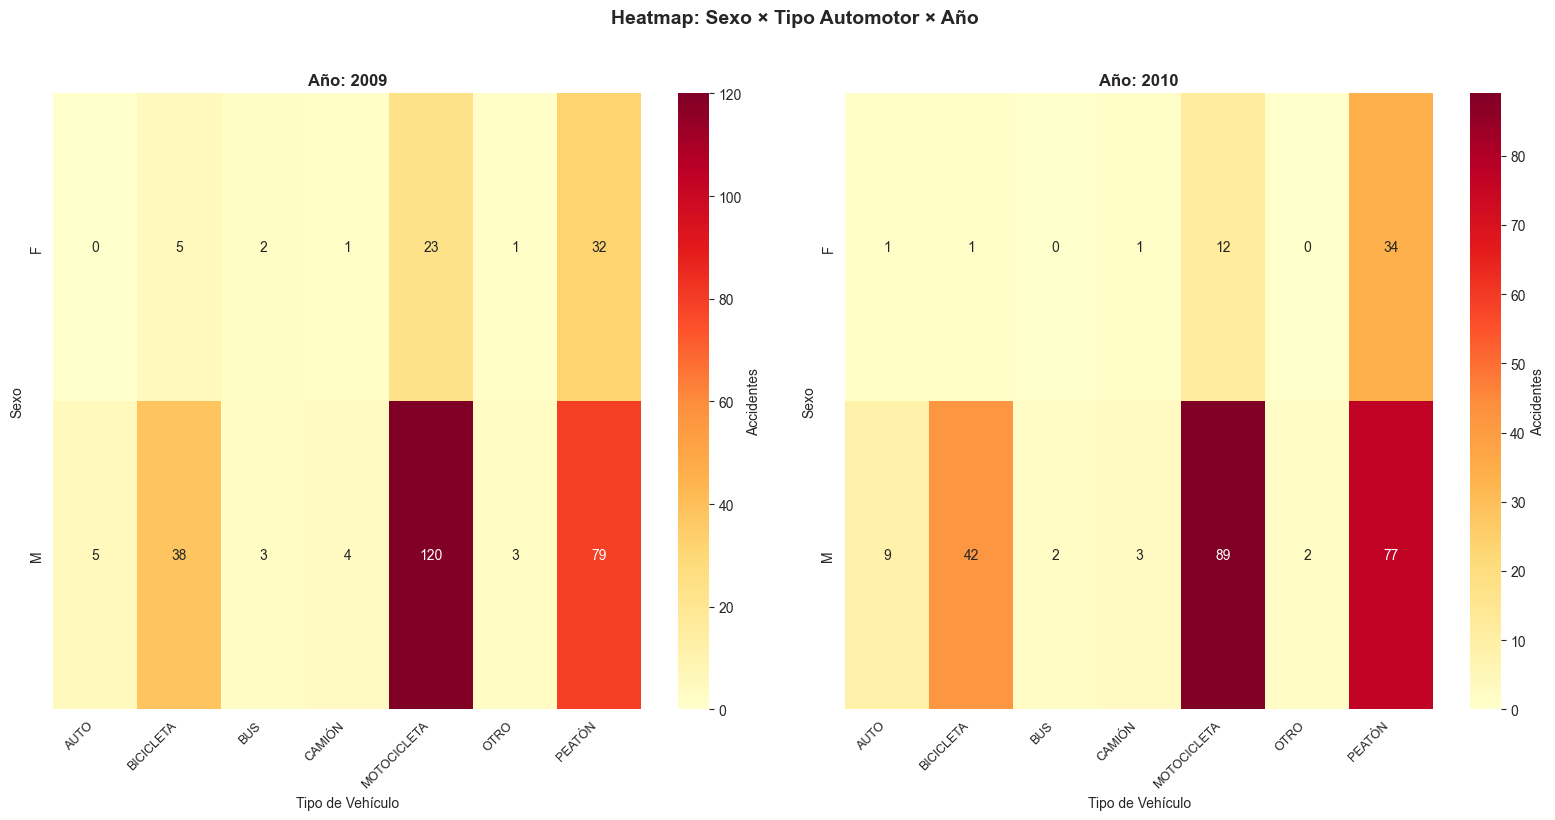

In [60]:
# GRÁFICA 1: Sexo × Tipo Automotor × Año (Heatmap con facetas por año)
# ============================================================================
print("\nGenerando Gráfica 1: Sexo × Tipo Automotor × Año...")
fig1 = plt.figure(figsize=(16, 8))

años = sorted(df['AÑO'].unique())

for idx, año in enumerate(años, 1):
    ax = fig1.add_subplot(1, len(años), idx)
    df_año = df[df['AÑO'] == año]
    
    matriz = pd.crosstab(df_año['SEXO'], df_año['TIPO AUTOMOTOR'])
    sns.heatmap(matriz, annot=True, fmt='d', cmap='YlOrRd', ax=ax, 
                cbar_kws={'label': 'Accidentes'}, vmin=0)
    ax.set_title(f'Año: {año}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Tipo de Vehículo')
    ax.set_ylabel('Sexo')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

plt.suptitle('Heatmap: Sexo × Tipo Automotor × Año', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('grafica1_sexo_tipo_año.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
# # ============================================================================
# # FIGURA 1: Género por año + Proporción por edad agrupada
# # ============================================================================
# fig, axes = plt.subplots(2, 2, figsize=(16, 10))


# # 1.1 Accidentes por género y año
# ax1 = axes[0, 0]
# genero_ano = df.groupby(['AÑO', 'SEXO']).size().unstack(fill_value=0)
# genero_ano.plot(ax=ax1, marker='o', linewidth=2)
# ax1.set_title('Accidentes por Género y Año', fontsize=12, fontweight='bold')
# ax1.set_xlabel('Año')
# ax1.set_ylabel('Cantidad de Accidentes')
# ax1.legend(title='Género')
# ax1.grid(True, alpha=0.3)

# # 1.2 Proporción de accidentalidad por edad agrupada
# ax2 = axes[0, 1]
# edad_dist = (df['EDAD AGRUPADA'].value_counts(normalize=True) * 100).sort_index()
# edad_dist.plot(kind='barh', ax=ax2, color='steelblue')
# ax2.set_title('Proporción de Accidentes por Edad Agrupada (%)', fontsize=12, fontweight='bold')
# ax2.set_xlabel('Porcentaje (%)')
# ax2.set_ylabel('Grupo de Edad')

# # 1.3 Accidentes por edad agrupada y género
# ax3 = axes[1, 0]
# edad_genero = df.groupby(['EDAD AGRUPADA', 'SEXO']).size().unstack(fill_value=0)
# edad_genero.plot(kind='bar', ax=ax3, width=0.8)
# ax3.set_title('Accidentes por Edad Agrupada y Género', fontsize=12, fontweight='bold')
# ax3.set_xlabel('Grupo de Edad')
# ax3.set_ylabel('Cantidad de Accidentes')
# ax3.legend(title='Género')
# ax3.tick_params(axis='x', rotation=45)

# # 1.4 Tabla resumen de proporciones
# ax4 = axes[1, 1]
# ax4.axis('off')
# resumen_edad = df['EDAD AGRUPADA'].value_counts(normalize=True).sort_values(ascending=False) * 100
# tabla_data = [[f"{edad}", f"{pct:.2f}%"] for edad, pct in resumen_edad.items()]
# tabla = ax4.table(cellText=tabla_data, colLabels=['Edad Agrupada', 'Porcentaje'],
#                   cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
# tabla.auto_set_font_size(False)
# tabla.set_fontsize(9)
# tabla.scale(1, 2)
# ax4.set_title('Distribución Porcentual por Edad', fontsize=12, fontweight='bold', pad=20)

# plt.tight_layout()
# plt.savefig('1_genero_edad_analisis.png', dpi=300, bbox_inches='tight')
# plt.show()

# # ============================================================================
# # FIGURA 2: Fallecimientos por tipo de automotor, género y año
# # ============================================================================
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# # 2.1 Fallecimientos por tipo de automotor y año
# ax1 = axes[0]
# fallecimientos_tipo = df.groupby(['AÑO_DATA', 'TIPO_AUTOMOTOR']).size().unstack(fill_value=0)
# fallecimientos_tipo.plot(ax=ax1, marker='o', linewidth=2)
# ax1.set_title('Fallecimientos por Tipo de Automotor y Año', fontsize=12, fontweight='bold')
# ax1.set_xlabel('Año')
# ax1.set_ylabel('Cantidad de Fallecimientos')
# ax1.legend(title='Tipo de Automotor', bbox_to_anchor=(1.05, 1), loc='upper left')
# ax1.grid(True, alpha=0.3)

# # 2.2 Heatmap: Fallecimientos por género, automotor y año (agregado)
# ax2 = axes[1]
# genero_automotor_ano = df.groupby(['TIPO_AUTOMOTOR', 'SEXO', 'AÑO_DATA']).size().reset_index(name='count')
# pivot_data = genero_automotor_ano.pivot_table(values='count', index='TIPO_AUTOMOTOR', 
#                                                columns='SEXO', aggfunc='sum', fill_value=0)
# sns.heatmap(pivot_data, annot=True, fmt='g', cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'Cantidad'})
# ax2.set_title('Fallecimientos: Tipo Automotor vs Género (Total)', fontsize=12, fontweight='bold')
# ax2.set_ylabel('Tipo de Automotor')
# ax2.set_xlabel('Género')

# plt.tight_layout()
# plt.savefig('2_fallecimientos_automotor.png', dpi=300, bbox_inches='tight')
# plt.show()

# # ============================================================================
# # FIGURA 3: Distribución mensual de accidentes por año
# # ============================================================================
# fig, ax = plt.subplots(figsize=(16, 6))

# mensual_ano = df.groupby(['MES ACCIDENTE', 'AÑO_DATA']).size().unstack(fill_value=0)
# # Ordenar meses correctamente
# meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
#                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
# mensual_ano = mensual_ano.reindex([m for m in meses_orden if m in mensual_ano.index])

# mensual_ano.plot(ax=ax, marker='o', linewidth=2.5, markersize=8)
# ax.set_title('Distribución Mensual de Accidentes por Año', fontsize=13, fontweight='bold')
# ax.set_xlabel('Mes')
# ax.set_ylabel('Cantidad de Accidentes')
# ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.grid(True, alpha=0.3)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig('3_distribucion_mensual.png', dpi=300, bbox_inches='tight')
# plt.show()

# # ============================================================================
# # FIGURA 4: Distribución semanal de accidentes por año
# # ============================================================================
# fig, ax = plt.subplots(figsize=(16, 6))

# semanal_ano = df.groupby(['DIA SEMANA ACCIDENTE', 'AÑO_DATA']).size().unstack(fill_value=0)
# # Ordenar días correctamente
# dias_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
# semanal_ano = semanal_ano.reindex([d for d in dias_orden if d in semanal_ano.index])

# semanal_ano.plot(ax=ax, marker='s', linewidth=2.5, markersize=8)
# ax.set_title('Distribución Semanal de Accidentes por Año', fontsize=13, fontweight='bold')
# ax.set_xlabel('Día de la Semana')
# ax.set_ylabel('Cantidad de Accidentes')
# ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.grid(True, alpha=0.3)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig('4_distribucion_semanal.png', dpi=300, bbox_inches='tight')
# plt.show()

# # ============================================================================
# # TABLA RESUMEN: Respuestas a preguntas conductorias
# # ============================================================================
# print("\n" + "="*80)
# print("RESUMEN DE HALLAZGOS - ANÁLISIS DE ACCIDENTES EN CALI")
# print("="*80)

# # Pregunta 1: Género con más accidentes por año
# print("\n1. GÉNERO CON MÁS ACCIDENTES POR AÑO:")
# genero_por_ano = df.groupby(['AÑO_DATA', 'SEXO']).size().unstack(fill_value=0)
# genero_dominante = genero_por_ano.idxmax(axis=1)
# print(genero_por_ano)
# print("\nGénero dominante por año:")
# print(genero_dominante)

# # Pregunta 2: Proporción por edad agrupada
# print("\n2. PROPORCIÓN DE ACCIDENTALIDAD POR EDAD AGRUPADA:")
# proporciones_edad = (df['EDAD AGRUPADA'].value_counts(normalize=True) * 100).sort_values(ascending=False)
# print(proporciones_edad)

# # Pregunta 3: Tipo de automotor con más fallecimientos por año y género
# print("\n3. TIPO DE AUTOMOTOR CON MÁS FALLECIMIENTOS POR AÑO Y GÉNERO:")
# fallec_automotor = df.groupby(['AÑO_DATA', 'SEXO', 'TIPO_AUTOMOTOR']).size().reset_index(name='count')
# fallec_automotor_pivot = fallec_automotor.pivot_table(values='count', index=['AÑO_DATA', 'SEXO'], 
#                                                        columns='TIPO_AUTOMOTOR', aggfunc='sum', fill_value=0)
# print(fallec_automotor_pivot)

# # Pregunta 4 y 5: Resumen de patrones mensuales y semanales
# print("\n4. PICOS MENSUALES DE ACCIDENTES (Top 3):")
# picos_mensuales = df['MES ACCIDENTE'].value_counts().head(3)
# print(picos_mensuales)

# print("\n5. PICOS SEMANALES DE ACCIDENTES (Top 3):")
# picos_semanales = df['DIA SEMANA ACCIDENTE'].value_counts().head(3)
# print(picos_semanales)

In [62]:
!pip install geopandas


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Usando borde: BordeComunasMetros.shp
CRS del borde: EPSG:3115


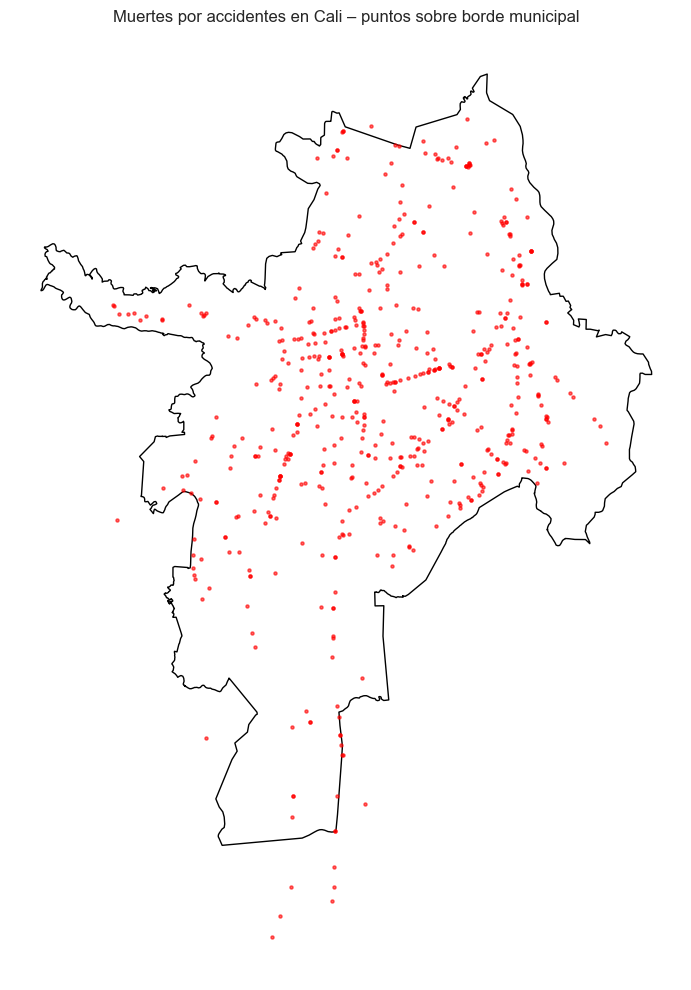

In [63]:
# --- Dependencias ---
import re
from pathlib import Path

import geopandas as gpd
from shapely.ops import unary_union
from shapely import make_valid  # shapely >= 2.0
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# 1) Configuración de rutas
# =========================
map_dir = Path(r"./data/Mapas")

# Buscar todos los .shp
shps = list(map_dir.glob("*.shp"))
if not shps:
    raise FileNotFoundError(f"No se encontraron .shp en: {map_dir}")

# ==============================
# 2) Elegir el shapefile de borde
# ==============================
# Patrones similares a R: "bord|borde|limite|límite|boundary"
pattern = re.compile(r"(bord|borde|limite|límite|boundary)", flags=re.IGNORECASE)

candidates = [p for p in shps if pattern.search(p.name)]
borde_path = candidates[0] if candidates else shps[0]  # fallback al primero si no hay candidato claro
print(f"Usando borde: {borde_path.name}")

# =======================================
# 3) Leer shapefile, validar CRS y geometría
# =======================================
borde_sf = gpd.read_file(borde_path)

# make_valid (equivalente a st_make_valid)
# (GeoPandas 0.14+ tiene GeoSeries.make_valid(); con shapely>=2 usar make_valid)
borde_sf["geometry"] = borde_sf.geometry.apply(make_valid)

# Verificar CRS (equivalente a stopifnot(!is.na(st_crs(.))))
if borde_sf.crs is None:
    # ⚠️ Si conoces el CRS del borde, defínelo aquí en caso de venir vacío:
    # borde_sf = borde_sf.set_crs("EPSG:32618", allow_override=True)
    raise ValueError("El shapefile de borde no tiene CRS definido. Configúralo con .set_crs().")

borde_crs = borde_sf.crs
print(f"CRS del borde: {borde_crs}")

# ==================================================
# 4) Unificar geometría del borde (a un solo polígono)
# ==================================================
# st_union + st_as_sf en R  → unary_union y envolver en GeoDataFrame
borde_union_geom = unary_union(borde_sf.geometry)
borde_union = gpd.GeoDataFrame({"id": [1]}, geometry=[borde_union_geom], crs=borde_crs)

# =========================================================
# 5) Construir GeoDataFrame de puntos desde tu DataFrame df
# =========================================================
# Intentamos usar columnas en metros; si no existen, usamos las de km * 1000
if {"coordenada X (metros)", "coordenada Y (metros)"}.issubset(df.columns):
    x = df["coordenada X (metros)"]
    y = df["coordenada Y (metros)"]
elif {"coordenada X (km)", "coordenada Y (km)"}.issubset(df.columns):
    x = df["coordenada X (km)"] * 1000.0
    y = df["coordenada Y (km)"] * 1000.0
else:
    raise KeyError("No se encontraron columnas de coordenadas esperadas en df.")

# Crear puntos
gdf_pts = gpd.GeoDataFrame(
    df.copy(),
    geometry=gpd.points_from_xy(x, y),
    crs=borde_crs  # ⇐ Asumimos que las coord. están en el mismo CRS que el borde
)

# ── Nota sobre CRS de los puntos ─────────────────────────────────────
# Si SABES que las coordenadas del DataFrame están en otro CRS, cámbialo aquí:
# gdf_pts = gdf_pts.set_crs("EPSG:3116", allow_override=True)
# y luego reproyecta:
# gdf_pts = gdf_pts.to_crs(borde_crs)
# ────────────────────────────────────────────────────────────────────

# =======================================================
# 6) (Opcional) Heurística simple para detectar desajustes
# =======================================================
# Si los X están ~1,000,000, podría ser un sistema local con falsos orígenes.
# Si sospechas que están en otro CRS, establece el CRS correcto arriba y usa to_crs(borde_crs).
if gdf_pts.crs != borde_union.crs:
    gdf_pts = gdf_pts.to_crs(borde_union.crs)

# ============================
# 7) Plot del borde y los puntos
# ============================
fig, ax = plt.subplots(figsize=(10, 10))
borde_union.plot(ax=ax, color="white", edgecolor="black", linewidth=1)
gdf_pts.plot(ax=ax, markersize=5, color="red", alpha=0.6)

ax.set_title("Muertes por accidentes en Cali – puntos sobre borde municipal", fontsize=12)
ax.set_axis_off()
plt.tight_layout()
plt.show()


Usando borde: BordeComunasMetros.shp
Usando comunas: Barrios.shp

--- Diagnóstico inicial de comunas ---
Bounds comunas: [105436.11226412  97278.59736141 119175.63924749 116090.00098858]
⚙️ Ajustando posición: desplazamiento y escala hacia coordenadas reales de Cali...
--- Verificación de CRS final ---
CRS comunas: EPSG:3115
Bounds comunas: [705436.11226412 857278.59736141 719175.63924749 876090.00098858]


C:\Users\david\AppData\Local\Temp\ipykernel_7912\4081196839.py:96: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  comunas_centroid = comunas_sf.geometry.unary_union.centroid


🧭 Ajuste fino: desplazando comunas dx=349419.35, dy=3036.71


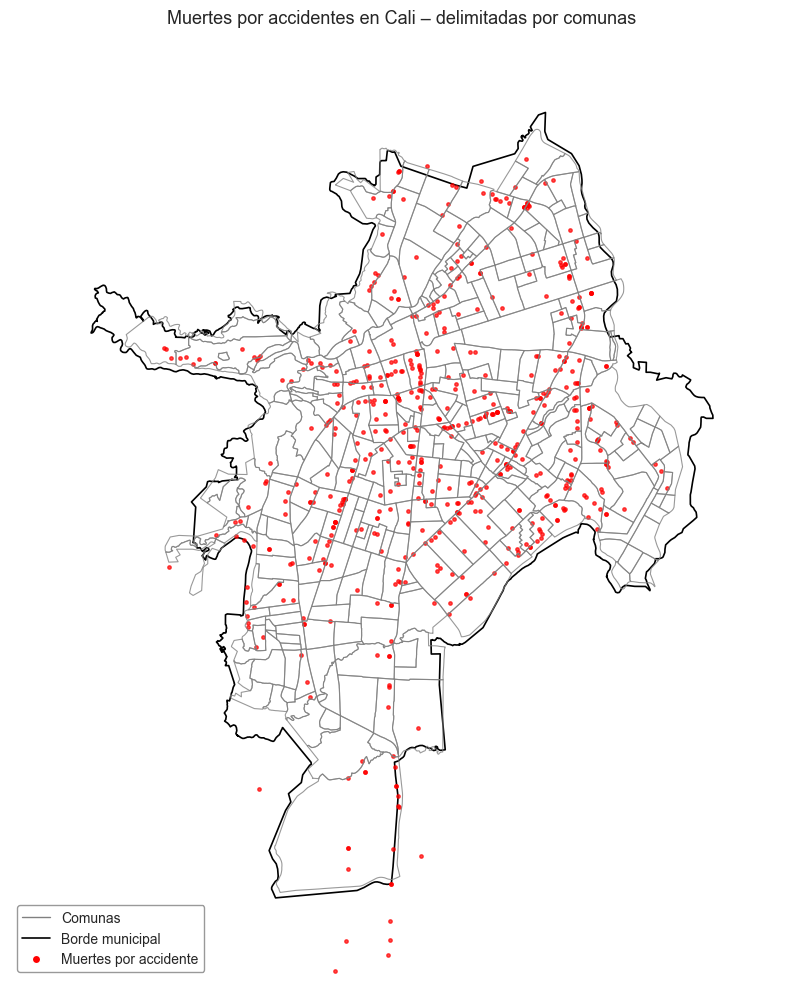


--- Verificación final ---
CRS borde: EPSG:3115
CRS comunas: EPSG:3115
CRS puntos: EPSG:3115
Bounds borde: [1054014.70780996  860180.90028309 1069344.10449858  879543.51294291]
Bounds comunas: [1054855.46634715  860315.30444645 1068594.99333052  879126.70807362]
Bounds puntos: [1055822.32352   857871.436063 1068207.05885   878392.890747]


In [ ]:
# --- Dependencias ---
import re
from pathlib import Path
import geopandas as gpd
from shapely.ops import unary_union
from shapely import make_valid
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import box
import numpy as np

# =========================
# 1) Configuración de rutas
# =========================
map_dir = Path(r"./data/Mapas")

# Buscar todos los .shp
shps = list(map_dir.glob("*.shp"))
if not shps:
    raise FileNotFoundError(f"No se encontraron .shp en: {map_dir}")

# ======================================================
# 2) Elegir shapefile del borde y shapefile de comunas
# ======================================================
pattern_borde = re.compile(r"(bord|borde|limite|límite|boundary)", flags=re.IGNORECASE)
pattern_comunas = re.compile(r"(comuna|comunas|barrio|sectores?)", flags=re.IGNORECASE)

borde_candidates = [p for p in shps if pattern_borde.search(p.name)]
comuna_candidates = [p for p in shps if pattern_comunas.search(p.name)]

borde_path = borde_candidates[0] if borde_candidates else shps[0]
comunas_path = comuna_candidates[0] if comuna_candidates else None

print(f"Usando borde: {borde_path.name}")
if comunas_path:
    print(f"Usando comunas: {comunas_path.name}")
else:
    print("⚠️ No se encontró shapefile de comunas; solo se usará el borde municipal.")

# =======================================
# 3) Leer shapefiles y validar geometrías
# =======================================
borde_sf = gpd.read_file(borde_path)
borde_sf["geometry"] = borde_sf.geometry.apply(make_valid)

if borde_sf.crs is None:
    print("⚠️ El shapefile de borde no tiene CRS; se asigna EPSG:3115.")
    borde_sf = borde_sf.set_crs("EPSG:3115")

borde_crs = borde_sf.crs
borde_union_geom = unary_union(borde_sf.geometry)
borde_union = gpd.GeoDataFrame({"id": [1]}, geometry=[borde_union_geom], crs=borde_crs)

# Leer comunas (si existe)
if comunas_path:
    comunas_sf = gpd.read_file(comunas_path)
    comunas_sf["geometry"] = comunas_sf.geometry.apply(make_valid)
else:
    comunas_sf = None

# =========================================================
# 4) Normalizar CRS de comunas al del borde (EPSG:3115)
# =========================================================
if comunas_sf is not None:
    print("\n--- Diagnóstico inicial de comunas ---")
    print("Bounds comunas:", comunas_sf.total_bounds)

    if comunas_sf.crs is None:
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    com_bounds = comunas_sf.total_bounds
    borde_bounds = borde_sf.total_bounds
    scale_ratio = (borde_bounds[2] - borde_bounds[0]) / (com_bounds[2] - com_bounds[0])

    if com_bounds[0] < 500000:
        print("⚙️ Ajustando posición: desplazamiento y escala hacia coordenadas reales de Cali...")
        comunas_sf["geometry"] = comunas_sf.translate(xoff=600000, yoff=760000)
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    elif 8 < scale_ratio < 12:
        print("⚙️ Ajustando escala (parecen km en lugar de m)...")
        comunas_sf["geometry"] = comunas_sf.scale(xfact=10, yfact=10, origin=(0, 0))
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    elif comunas_sf.crs != borde_sf.crs:
        comunas_sf = comunas_sf.to_crs(borde_sf.crs)

    print("--- Verificación de CRS final ---")
    print("CRS comunas:", comunas_sf.crs)
    print("Bounds comunas:", comunas_sf.total_bounds)

    # --- 🔧 Ajuste fino automático ---
    from shapely.affinity import translate

    borde_centroid = borde_union.geometry.centroid.iloc[0]
    comunas_centroid = comunas_sf.geometry.unary_union.centroid

    dx = borde_centroid.x - comunas_centroid.x
    dy = borde_centroid.y - comunas_centroid.y

    print(f"🧭 Ajuste fino: desplazando comunas dx={dx:.2f}, dy={dy:.2f}")
    comunas_sf["geometry"] = comunas_sf.translate(xoff=dx, yoff=dy)


# =========================================================
# 5) Crear GeoDataFrame de puntos (Muertes)
# =========================================================
if {"coordenada X (metros)", "coordenada Y (metros)"}.issubset(df.columns):
    x_raw = df["coordenada X (metros)"].astype(float)
    y_raw = df["coordenada Y (metros)"].astype(float)
else:
    raise KeyError("No se encontraron columnas de coordenadas en metros en df.")

gdf_pts = gpd.GeoDataFrame(df.copy(),
                           geometry=gpd.points_from_xy(x_raw, y_raw),
                           crs="EPSG:3115")

# =========================================================
# 6) Plot final
# =========================================================
fig, ax = plt.subplots(figsize=(10, 10))

if comunas_sf is not None:
    comunas_sf.boundary.plot(ax=ax, color="gray", linewidth=0.8, alpha=0.8, label="Comunas")

borde_union.plot(ax=ax, color="none", edgecolor="black", linewidth=1.2, label="Borde municipal")
gdf_pts.plot(ax=ax, markersize=6, color="red", alpha=0.7, label="Muertes por accidente")

ax.set_title("Muertes por accidentes en Cali – delimitadas por comunas", fontsize=13)
ax.set_axis_off()

# --- Mejoras visuales ---
red_dot = plt.Line2D([0], [0], marker='o', color='w', label='Muertes por accidente',
                     markerfacecolor='red', markersize=6)
gray_line = plt.Line2D([0], [0], color='gray', lw=1, label='Comunas')
black_line = plt.Line2D([0], [0], color='black', lw=1.2, label='Borde municipal')

# Centrado y márgenes suaves
ax.set_xlim(borde_union.total_bounds[0] - 2000, borde_union.total_bounds[2] + 2000)
ax.set_ylim(borde_union.total_bounds[1] - 2000, borde_union.total_bounds[3] + 2000)
ax.set_aspect('equal', adjustable='box')
ax.set_facecolor("#f8f9fa")

plt.legend(handles=[gray_line, black_line, red_dot],
           loc='lower left', frameon=True, facecolor='white', edgecolor='gray')

plt.tight_layout()
plt.show()

# =========================================================
# 7) Verificación rápida
# =========================================================
print("\n--- Verificación final ---")
print("CRS borde:", borde_sf.crs)
if comunas_sf is not None:
    print("CRS comunas:", comunas_sf.crs)
print("CRS puntos:", gdf_pts.crs)
print("Bounds borde:", borde_sf.total_bounds)
if comunas_sf is not None:
    print("Bounds comunas:", comunas_sf.total_bounds)
print("Bounds puntos:", gdf_pts.total_bounds)


Usando borde: BordeComunasMetros.shp
Usando comunas: Barrios.shp

--- Diagnóstico inicial de comunas ---
Bounds comunas: [105436.11226412  97278.59736141 119175.63924749 116090.00098858]
⚙️ Ajustando posición: desplazamiento y escala hacia coordenadas reales de Cali...
--- Verificación de CRS final ---
CRS comunas: EPSG:3115
Bounds comunas: [705436.11226412 857278.59736141 719175.63924749 876090.00098858]


C:\Users\david\AppData\Local\Temp\ipykernel_7912\4059561918.py:96: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  comunas_centroid = comunas_sf.geometry.unary_union.centroid


🧭 Ajuste fino: desplazando comunas dx=349419.35, dy=3036.71


C:\Users\david\AppData\Local\Temp\ipykernel_7912\4059561918.py:144: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


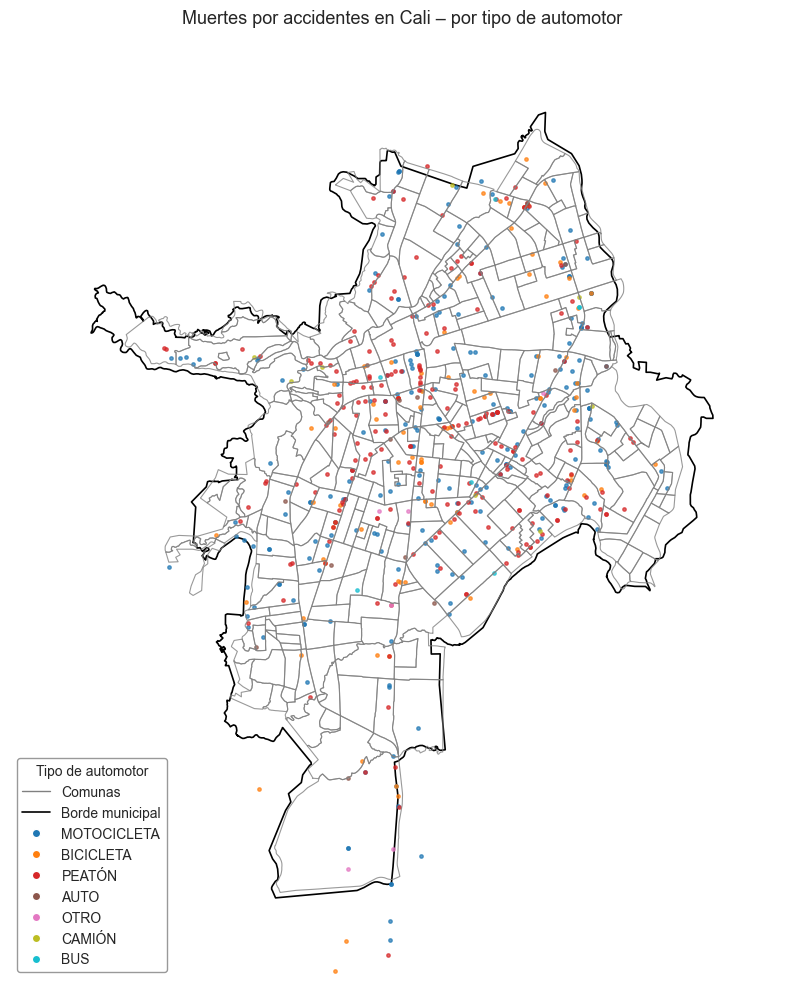

In [75]:
# --- Dependencias ---
import re
from pathlib import Path
import geopandas as gpd
from shapely.ops import unary_union
from shapely import make_valid
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import box
import numpy as np

# =========================
# 1) Configuración de rutas
# =========================
map_dir = Path(r"./data/Mapas")

# Buscar todos los .shp
shps = list(map_dir.glob("*.shp"))
if not shps:
    raise FileNotFoundError(f"No se encontraron .shp en: {map_dir}")

# ======================================================
# 2) Elegir shapefile del borde y shapefile de comunas
# ======================================================
pattern_borde = re.compile(r"(bord|borde|limite|límite|boundary)", flags=re.IGNORECASE)
pattern_comunas = re.compile(r"(comuna|comunas|barrio|sectores?)", flags=re.IGNORECASE)

borde_candidates = [p for p in shps if pattern_borde.search(p.name)]
comuna_candidates = [p for p in shps if pattern_comunas.search(p.name)]

borde_path = borde_candidates[0] if borde_candidates else shps[0]
comunas_path = comuna_candidates[0] if comuna_candidates else None

print(f"Usando borde: {borde_path.name}")
if comunas_path:
    print(f"Usando comunas: {comunas_path.name}")
else:
    print("⚠️ No se encontró shapefile de comunas; solo se usará el borde municipal.")

# =======================================
# 3) Leer shapefiles y validar geometrías
# =======================================
borde_sf = gpd.read_file(borde_path)
borde_sf["geometry"] = borde_sf.geometry.apply(make_valid)

if borde_sf.crs is None:
    print("⚠️ El shapefile de borde no tiene CRS; se asigna EPSG:3115.")
    borde_sf = borde_sf.set_crs("EPSG:3115")

borde_crs = borde_sf.crs
borde_union_geom = unary_union(borde_sf.geometry)
borde_union = gpd.GeoDataFrame({"id": [1]}, geometry=[borde_union_geom], crs=borde_crs)

# Leer comunas (si existe)
if comunas_path:
    comunas_sf = gpd.read_file(comunas_path)
    comunas_sf["geometry"] = comunas_sf.geometry.apply(make_valid)
else:
    comunas_sf = None

# =========================================================
# 4) Normalizar CRS de comunas al del borde (EPSG:3115)
# =========================================================
if comunas_sf is not None:
    print("\n--- Diagnóstico inicial de comunas ---")
    print("Bounds comunas:", comunas_sf.total_bounds)

    if comunas_sf.crs is None:
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    com_bounds = comunas_sf.total_bounds
    borde_bounds = borde_sf.total_bounds
    scale_ratio = (borde_bounds[2] - borde_bounds[0]) / (com_bounds[2] - com_bounds[0])

    if com_bounds[0] < 500000:
        print("⚙️ Ajustando posición: desplazamiento y escala hacia coordenadas reales de Cali...")
        comunas_sf["geometry"] = comunas_sf.translate(xoff=600000, yoff=760000)
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    elif 8 < scale_ratio < 12:
        print("⚙️ Ajustando escala (parecen km en lugar de m)...")
        comunas_sf["geometry"] = comunas_sf.scale(xfact=10, yfact=10, origin=(0, 0))
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    elif comunas_sf.crs != borde_sf.crs:
        comunas_sf = comunas_sf.to_crs(borde_sf.crs)

    print("--- Verificación de CRS final ---")
    print("CRS comunas:", comunas_sf.crs)
    print("Bounds comunas:", comunas_sf.total_bounds)

    # --- 🔧 Ajuste fino automático ---
    from shapely.affinity import translate

    borde_centroid = borde_union.geometry.centroid.iloc[0]
    comunas_centroid = comunas_sf.geometry.unary_union.centroid

    dx = borde_centroid.x - comunas_centroid.x
    dy = borde_centroid.y - comunas_centroid.y

    print(f"🧭 Ajuste fino: desplazando comunas dx={dx:.2f}, dy={dy:.2f}")
    comunas_sf["geometry"] = comunas_sf.translate(xoff=dx, yoff=dy)


# =========================================================
# 5) Crear GeoDataFrame de puntos (Muertes)
# =========================================================
if {"coordenada X (metros)", "coordenada Y (metros)"}.issubset(df.columns):
    x_raw = df["coordenada X (metros)"].astype(float)
    y_raw = df["coordenada Y (metros)"].astype(float)
else:
    raise KeyError("No se encontraron columnas de coordenadas en metros en df.")

gdf_pts = gpd.GeoDataFrame(df.copy(),
                           geometry=gpd.points_from_xy(x_raw, y_raw),
                           crs="EPSG:3115")

# =========================================================
# 6) Plot final (por tipo de automotor)
# =========================================================
fig, ax = plt.subplots(figsize=(10, 10))

if comunas_sf is not None:
    comunas_sf.boundary.plot(ax=ax, color="gray", linewidth=0.8, alpha=0.8, label="Comunas")

borde_union.plot(ax=ax, color="none", edgecolor="black", linewidth=1.2, label="Borde municipal")

# --- Nuevo: color por tipo de automotor ---
if "TIPO AUTOMOTOR" in gdf_pts.columns:
    tipos = gdf_pts["TIPO AUTOMOTOR"].dropna().unique()
    colores = plt.cm.tab10(np.linspace(0, 1, len(tipos)))  # paleta de colores automática

    for tipo, color in zip(tipos, colores):
        subset = gdf_pts[gdf_pts["TIPO AUTOMOTOR"] == tipo]
        subset.plot(ax=ax, markersize=6, color=color, alpha=0.7, label=str(tipo))
else:
    print("⚠️ No se encontró la columna 'TIPO AUTOMOTOR'; se usará color único.")
    gdf_pts.plot(ax=ax, markersize=6, color="red", alpha=0.7, label="Muertes por accidente")

ax.set_title("Muertes por accidentes en Cali – por tipo de automotor", fontsize=13)
ax.set_axis_off()

# --- Leyenda mejorada ---
handles, labels = ax.get_legend_handles_labels()
legend_elements = [
    plt.Line2D([0], [0], color='gray', lw=1, label='Comunas'),
    plt.Line2D([0], [0], color='black', lw=1.2, label='Borde municipal'),
]
for tipo, color in zip(tipos, colores):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                      label=str(tipo), markerfacecolor=color, markersize=6))

ax.set_xlim(borde_union.total_bounds[0] - 2000, borde_union.total_bounds[2] + 2000)
ax.set_ylim(borde_union.total_bounds[1] - 2000, borde_union.total_bounds[3] + 2000)
ax.set_aspect('equal', adjustable='box')
ax.set_facecolor("#f8f9fa")

plt.legend(handles=legend_elements,
           loc='lower left', frameon=True, facecolor='white', edgecolor='gray',
           title="Tipo de automotor")

plt.tight_layout()
plt.show()


Usando borde: BordeComunasMetros.shp
Usando comunas: Barrios.shp

--- Diagnóstico inicial de comunas ---
Bounds comunas: [105436.11226412  97278.59736141 119175.63924749 116090.00098858]
⚙️ Ajustando posición: desplazamiento y escala hacia coordenadas reales de Cali...
--- Verificación de CRS final ---
CRS comunas: EPSG:3115
Bounds comunas: [705436.11226412 857278.59736141 719175.63924749 876090.00098858]


C:\Users\david\AppData\Local\Temp\ipykernel_7912\3466873107.py:96: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  comunas_centroid = comunas_sf.geometry.unary_union.centroid


🧭 Ajuste fino: desplazando comunas dx=349419.35, dy=3036.71


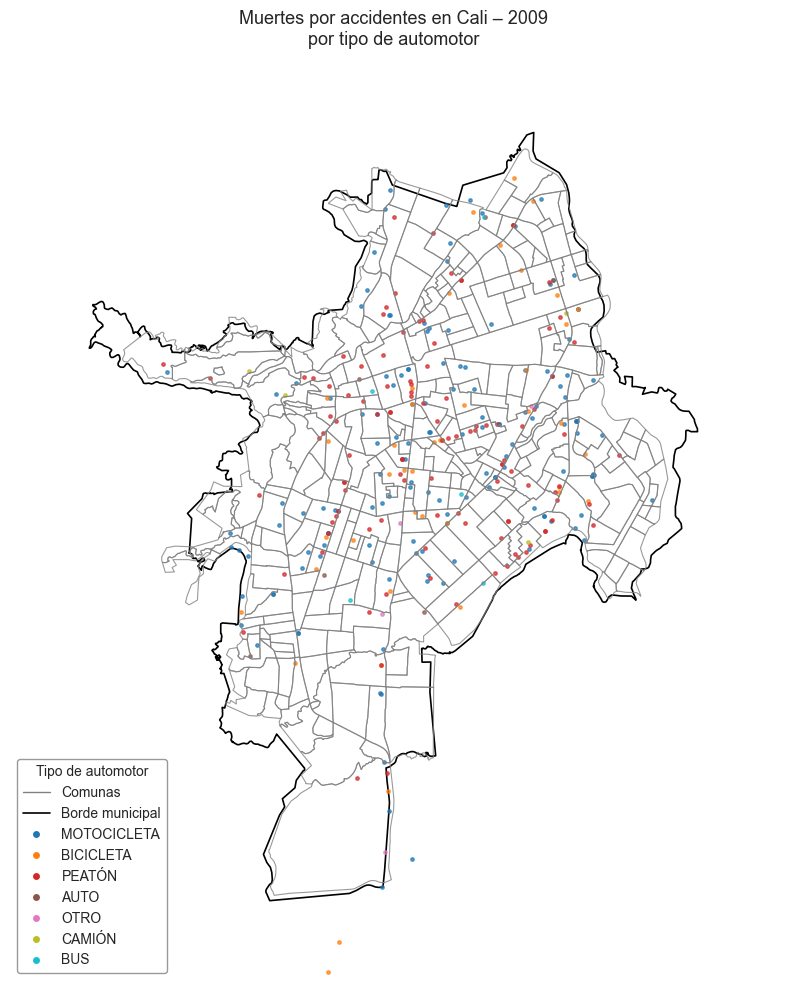

✅ Mapa generado y guardado: resultados_mapas\muertes_por_tipo_2009.png


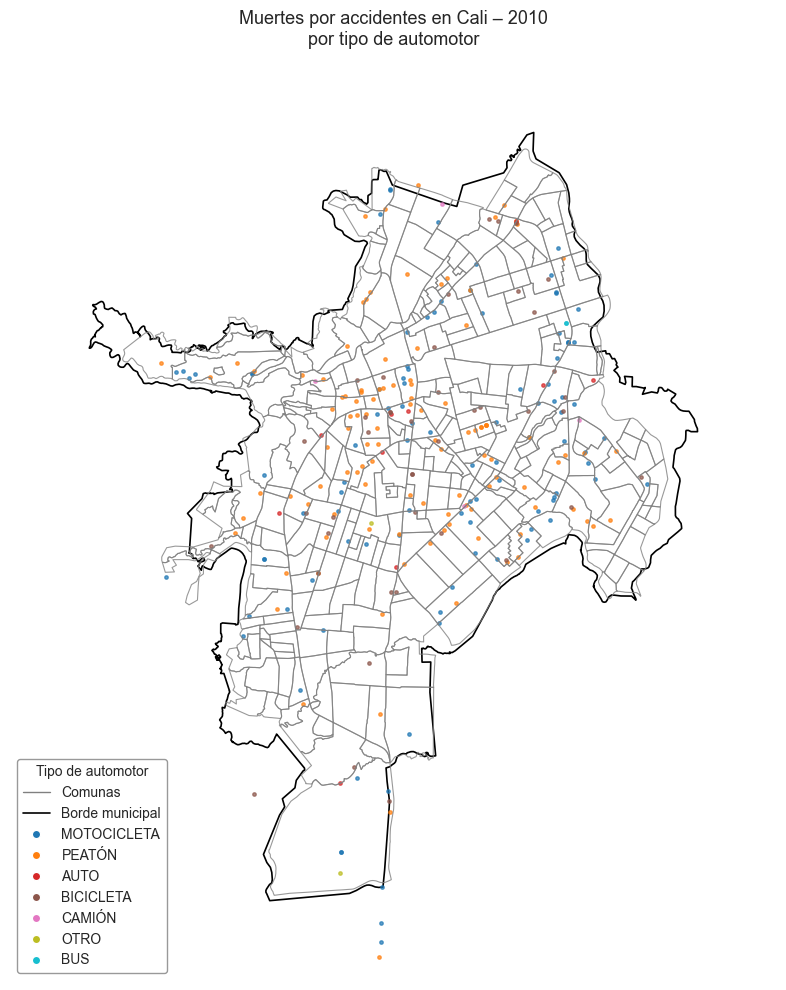

✅ Mapa generado y guardado: resultados_mapas\muertes_por_tipo_2010.png


In [77]:
# --- Dependencias ---
import re
from pathlib import Path
import geopandas as gpd
from shapely.ops import unary_union
from shapely import make_valid
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import box
import numpy as np

# =========================
# 1) Configuración de rutas
# =========================
map_dir = Path(r"./data/Mapas")

# Buscar todos los .shp
shps = list(map_dir.glob("*.shp"))
if not shps:
    raise FileNotFoundError(f"No se encontraron .shp en: {map_dir}")

# ======================================================
# 2) Elegir shapefile del borde y shapefile de comunas
# ======================================================
pattern_borde = re.compile(r"(bord|borde|limite|límite|boundary)", flags=re.IGNORECASE)
pattern_comunas = re.compile(r"(comuna|comunas|barrio|sectores?)", flags=re.IGNORECASE)

borde_candidates = [p for p in shps if pattern_borde.search(p.name)]
comuna_candidates = [p for p in shps if pattern_comunas.search(p.name)]

borde_path = borde_candidates[0] if borde_candidates else shps[0]
comunas_path = comuna_candidates[0] if comuna_candidates else None

print(f"Usando borde: {borde_path.name}")
if comunas_path:
    print(f"Usando comunas: {comunas_path.name}")
else:
    print("⚠️ No se encontró shapefile de comunas; solo se usará el borde municipal.")

# =======================================
# 3) Leer shapefiles y validar geometrías
# =======================================
borde_sf = gpd.read_file(borde_path)
borde_sf["geometry"] = borde_sf.geometry.apply(make_valid)

if borde_sf.crs is None:
    print("⚠️ El shapefile de borde no tiene CRS; se asigna EPSG:3115.")
    borde_sf = borde_sf.set_crs("EPSG:3115")

borde_crs = borde_sf.crs
borde_union_geom = unary_union(borde_sf.geometry)
borde_union = gpd.GeoDataFrame({"id": [1]}, geometry=[borde_union_geom], crs=borde_crs)

# Leer comunas (si existe)
if comunas_path:
    comunas_sf = gpd.read_file(comunas_path)
    comunas_sf["geometry"] = comunas_sf.geometry.apply(make_valid)
else:
    comunas_sf = None

# =========================================================
# 4) Normalizar CRS de comunas al del borde (EPSG:3115)
# =========================================================
if comunas_sf is not None:
    print("\n--- Diagnóstico inicial de comunas ---")
    print("Bounds comunas:", comunas_sf.total_bounds)

    if comunas_sf.crs is None:
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    com_bounds = comunas_sf.total_bounds
    borde_bounds = borde_sf.total_bounds
    scale_ratio = (borde_bounds[2] - borde_bounds[0]) / (com_bounds[2] - com_bounds[0])

    if com_bounds[0] < 500000:
        print("⚙️ Ajustando posición: desplazamiento y escala hacia coordenadas reales de Cali...")
        comunas_sf["geometry"] = comunas_sf.translate(xoff=600000, yoff=760000)
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    elif 8 < scale_ratio < 12:
        print("⚙️ Ajustando escala (parecen km en lugar de m)...")
        comunas_sf["geometry"] = comunas_sf.scale(xfact=10, yfact=10, origin=(0, 0))
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    elif comunas_sf.crs != borde_sf.crs:
        comunas_sf = comunas_sf.to_crs(borde_sf.crs)

    print("--- Verificación de CRS final ---")
    print("CRS comunas:", comunas_sf.crs)
    print("Bounds comunas:", comunas_sf.total_bounds)

    # --- 🔧 Ajuste fino automático ---
    from shapely.affinity import translate

    borde_centroid = borde_union.geometry.centroid.iloc[0]
    comunas_centroid = comunas_sf.geometry.unary_union.centroid

    dx = borde_centroid.x - comunas_centroid.x
    dy = borde_centroid.y - comunas_centroid.y

    print(f"🧭 Ajuste fino: desplazando comunas dx={dx:.2f}, dy={dy:.2f}")
    comunas_sf["geometry"] = comunas_sf.translate(xoff=dx, yoff=dy)


# =========================================================
# 5) Crear GeoDataFrame de puntos (Muertes)
# =========================================================
if {"coordenada X (metros)", "coordenada Y (metros)"}.issubset(df.columns):
    x_raw = df["coordenada X (metros)"].astype(float)
    y_raw = df["coordenada Y (metros)"].astype(float)
else:
    raise KeyError("No se encontraron columnas de coordenadas en metros en df.")

gdf_pts = gpd.GeoDataFrame(df.copy(),
                           geometry=gpd.points_from_xy(x_raw, y_raw),
                           crs="EPSG:3115")

# =========================================================
# 6) Plot final (por tipo de automotor y por año)
# =========================================================

# Verificar columnas requeridas
if "TIPO AUTOMOTOR" not in gdf_pts.columns:
    raise KeyError("La columna 'TIPO AUTOMOTOR' no existe en los datos.")
if not any(c in gdf_pts.columns for c in ["AÑO", "ANO_OCURRENCIA", "YEAR", "Fecha", "fecha"]):
    raise KeyError("No se encontró una columna de año (por ejemplo 'AÑO' o 'ANO_OCURRENCIA').")

# Detectar automáticamente la columna del año
year_col = next(c for c in ["AÑO", "ANO_OCURRENCIA", "YEAR", "Fecha", "fecha"] if c in gdf_pts.columns)

# Obtener lista de años únicos ordenada
años = sorted(gdf_pts[year_col].dropna().unique())

# Crear carpeta de salida (opcional)
output_dir = Path("./resultados_mapas")
output_dir.mkdir(exist_ok=True)

for año in años:
    subset_year = gdf_pts[gdf_pts[year_col] == año]

    fig, ax = plt.subplots(figsize=(10, 10))

    # Comunas y borde
    if comunas_sf is not None:
        comunas_sf.boundary.plot(ax=ax, color="gray", linewidth=0.8, alpha=0.8, label="Comunas")
    borde_union.plot(ax=ax, color="none", edgecolor="black", linewidth=1.2, label="Borde municipal")

    # --- Puntos por tipo de automotor ---
    tipos = subset_year["TIPO AUTOMOTOR"].dropna().unique()
    colores = plt.cm.tab10(np.linspace(0, 1, len(tipos)))

    for tipo, color in zip(tipos, colores):
        subset_tipo = subset_year[subset_year["TIPO AUTOMOTOR"] == tipo]
        subset_tipo.plot(ax=ax, markersize=6, color=color, alpha=0.7, label=str(tipo))

    # Título y estilo
    ax.set_title(f"Muertes por accidentes en Cali – {año}\npor tipo de automotor", fontsize=13)
    ax.set_axis_off()
    ax.set_xlim(borde_union.total_bounds[0] - 2000, borde_union.total_bounds[2] + 2000)
    ax.set_ylim(borde_union.total_bounds[1] - 2000, borde_union.total_bounds[3] + 2000)
    ax.set_aspect('equal', adjustable='box')
    ax.set_facecolor("#f8f9fa")

    # --- Leyenda ---
    legend_elements = [
        plt.Line2D([0], [0], color='gray', lw=1, label='Comunas'),
        plt.Line2D([0], [0], color='black', lw=1.2, label='Borde municipal'),
    ]
    for tipo, color in zip(tipos, colores):
        legend_elements.append(
            plt.Line2D([0], [0], marker='o', color='w', label=str(tipo),
                       markerfacecolor=color, markersize=6)
        )

    plt.legend(handles=legend_elements,
               loc='lower left', frameon=True, facecolor='white', edgecolor='gray',
               title="Tipo de automotor")

    plt.tight_layout()
    plt.show()

    # --- Guardar automáticamente ---
    salida = output_dir / f"muertes_por_tipo_{año}.png"
    fig.savefig(salida, dpi=300)
    plt.close(fig)

    print(f"✅ Mapa generado y guardado: {salida}")


Usando borde: BordeComunasMetros.shp
Usando comunas: Barrios.shp

--- Diagnóstico inicial de comunas ---
Bounds comunas: [105436.11226412  97278.59736141 119175.63924749 116090.00098858]
⚙️ Ajustando posición: desplazamiento y escala hacia coordenadas reales de Cali...
--- Verificación de CRS final ---
CRS comunas: EPSG:3115
Bounds comunas: [705436.11226412 857278.59736141 719175.63924749 876090.00098858]


C:\Users\david\AppData\Local\Temp\ipykernel_7912\977146222.py:100: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  comunas_centroid = comunas_sf.geometry.unary_union.centroid


🧭 Ajuste fino: desplazando comunas dx=349419.35, dy=3036.71
📝 Usando columna 'NOM_BARRIO' para etiquetas.


C:\Users\david\AppData\Local\Temp\ipykernel_7912\977146222.py:167: UserWarning: Glyph 145 (\x91) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 145 (\x91) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


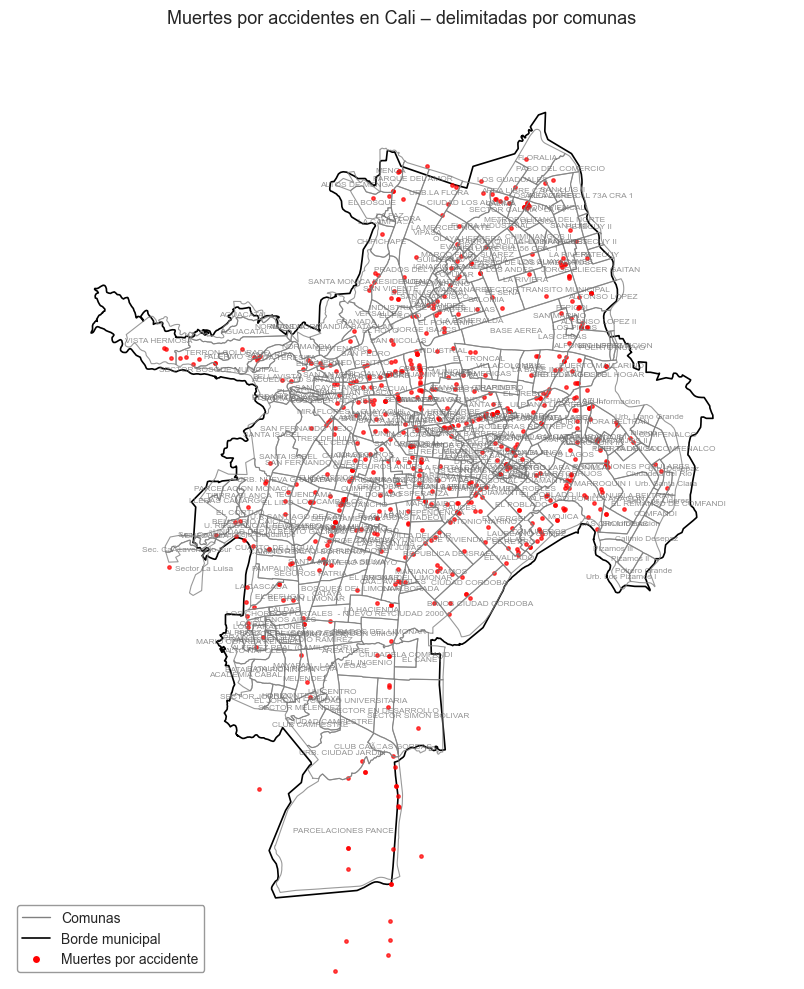


--- Verificación final ---
CRS borde: EPSG:3115
CRS comunas: EPSG:3115
CRS puntos: EPSG:3115
Bounds borde: [1054014.70780996  860180.90028309 1069344.10449858  879543.51294291]
Bounds comunas: [1054855.46634715  860315.30444645 1068594.99333052  879126.70807362]
Bounds puntos: [1055822.32352   857871.436063 1068207.05885   878392.890747]


In [ ]:

# --- Dependencias ---
import re
from pathlib import Path
import geopandas as gpd
from shapely.ops import unary_union
from shapely import make_valid
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import box
import numpy as np

# =========================
# 1) Configuración de rutas
# =========================
map_dir = Path(r"./data/Mapas")

# Buscar todos los .shp
shps = list(map_dir.glob("*.shp"))
if not shps:
    raise FileNotFoundError(f"No se encontraron .shp en: {map_dir}")

# ======================================================
# 2) Elegir shapefile del borde y shapefile de comunas
# ======================================================
pattern_borde = re.compile(r"(bord|borde|limite|límite|boundary)", flags=re.IGNORECASE)
pattern_comunas = re.compile(r"(comuna|comunas|barrio|sectores?)", flags=re.IGNORECASE)

borde_candidates = [p for p in shps if pattern_borde.search(p.name)]
comuna_candidates = [p for p in shps if pattern_comunas.search(p.name)]

borde_path = borde_candidates[0] if borde_candidates else shps[0]
comunas_path = comuna_candidates[0] if comuna_candidates else None

print(f"Usando borde: {borde_path.name}")
if comunas_path:
    print(f"Usando comunas: {comunas_path.name}")
else:
    print("⚠️ No se encontró shapefile de comunas; solo se usará el borde municipal.")

# =======================================
# 3) Leer shapefiles y validar geometrías
# =======================================
borde_sf = gpd.read_file(borde_path)
borde_sf["geometry"] = borde_sf.geometry.apply(make_valid)

if borde_sf.crs is None:
    print("⚠️ El shapefile de borde no tiene CRS; se asigna EPSG:3115.")
    borde_sf = borde_sf.set_crs("EPSG:3115")

borde_crs = borde_sf.crs
borde_union_geom = unary_union(borde_sf.geometry)
borde_union = gpd.GeoDataFrame({"id": [1]}, geometry=[borde_union_geom], crs=borde_crs)

# Leer comunas (si existe)
if comunas_path:
    comunas_sf = gpd.read_file(comunas_path)
    comunas_sf["geometry"] = comunas_sf.geometry.apply(make_valid)
else:
    comunas_sf = None

# =========================================================
# 4) Normalizar CRS de comunas al del borde (EPSG:3115)
# =========================================================
if comunas_sf is not None:
    print("\n--- Diagnóstico inicial de comunas ---")
    print("Bounds comunas:", comunas_sf.total_bounds)

    if comunas_sf.crs is None:
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    com_bounds = comunas_sf.total_bounds
    borde_bounds = borde_sf.total_bounds
    scale_ratio = (borde_bounds[2] - borde_bounds[0]) / (com_bounds[2] - com_bounds[0])

    if com_bounds[0] < 500000:
        print("⚙️ Ajustando posición: desplazamiento y escala hacia coordenadas reales de Cali...")
        comunas_sf["geometry"] = comunas_sf.translate(xoff=600000, yoff=760000)
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    elif 8 < scale_ratio < 12:
        print("⚙️ Ajustando escala (parecen km en lugar de m)...")
        comunas_sf["geometry"] = comunas_sf.scale(xfact=10, yfact=10, origin=(0, 0))
        comunas_sf = comunas_sf.set_crs("EPSG:3115", allow_override=True)

    elif comunas_sf.crs != borde_sf.crs:
        comunas_sf = comunas_sf.to_crs(borde_sf.crs)

    print("--- Verificación de CRS final ---")
    print("CRS comunas:", comunas_sf.crs)
    print("Bounds comunas:", comunas_sf.total_bounds)

    # --- 🔧 Ajuste fino automático ---
    from shapely.affinity import translate
    borde_centroid = borde_union.geometry.centroid.iloc[0]
    comunas_centroid = comunas_sf.geometry.unary_union.centroid
    dx = borde_centroid.x - comunas_centroid.x
    dy = borde_centroid.y - comunas_centroid.y
    print(f"🧭 Ajuste fino: desplazando comunas dx={dx:.2f}, dy={dy:.2f}")
    comunas_sf["geometry"] = comunas_sf.translate(xoff=dx, yoff=dy)


# =========================================================
# 5) Crear GeoDataFrame de puntos (Muertes)
# =========================================================
if {"coordenada X (metros)", "coordenada Y (metros)"}.issubset(df.columns):
    x_raw = df["coordenada X (metros)"].astype(float)
    y_raw = df["coordenada Y (metros)"].astype(float)
else:
    raise KeyError("No se encontraron columnas de coordenadas en metros en df.")

gdf_pts = gpd.GeoDataFrame(df.copy(),
                           geometry=gpd.points_from_xy(x_raw, y_raw),
                           crs="EPSG:3115")

# =========================================================
# 6) Plot base
# =========================================================
fig, ax = plt.subplots(figsize=(10, 10))

if comunas_sf is not None:
    comunas_sf.boundary.plot(ax=ax, color="gray", linewidth=0.8, alpha=0.8, label="Comunas")

borde_union.plot(ax=ax, color="none", edgecolor="black", linewidth=1.2, label="Borde municipal")
gdf_pts.plot(ax=ax, markersize=6, color="red", alpha=0.7, label="Muertes por accidente")

ax.set_title("Muertes por accidentes en Cali – delimitadas por comunas", fontsize=13)
ax.set_axis_off()

# =========================================================
# 6.1) Añadir etiquetas de barrios/comunas
# =========================================================
if comunas_sf is not None:
    posibles_cols = [c for c in comunas_sf.columns if re.search(r"(barrio|nombre|comuna|sector)", c, re.IGNORECASE)]
    if posibles_cols:
        label_col = posibles_cols[0]
        print(f"📝 Usando columna '{label_col}' para etiquetas.")
        for idx, row in comunas_sf.iterrows():
            centroid = row.geometry.centroid
            ax.text(centroid.x, centroid.y,
                    str(row[label_col]),
                    fontsize=6, color="dimgray",
                    ha='center', va='center', alpha=0.7)
    else:
        print("⚠️ No se encontró columna de nombre en las comunas para etiquetar.")

# =========================================================
# 6.2) Mejoras visuales
# =========================================================
red_dot = plt.Line2D([0], [0], marker='o', color='w', label='Muertes por accidente',
                     markerfacecolor='red', markersize=6)
gray_line = plt.Line2D([0], [0], color='gray', lw=1, label='Comunas')
black_line = plt.Line2D([0], [0], color='black', lw=1.2, label='Borde municipal')

ax.set_xlim(borde_union.total_bounds[0] - 2000, borde_union.total_bounds[2] + 2000)
ax.set_ylim(borde_union.total_bounds[1] - 2000, borde_union.total_bounds[3] + 2000)
ax.set_aspect('equal', adjustable='box')
ax.set_facecolor("#f8f9fa")

plt.legend(handles=[gray_line, black_line, red_dot],
           loc='lower left', frameon=True, facecolor='white', edgecolor='gray')

plt.tight_layout()
plt.show()

# =========================================================
# 7) Verificación rápida
# =========================================================
print("\n--- Verificación final ---")
print("CRS borde:", borde_sf.crs)
if comunas_sf is not None:
    print("CRS comunas:", comunas_sf.crs)
print("CRS puntos:", gdf_pts.crs)
print("Bounds borde:", borde_sf.total_bounds)
if comunas_sf is not None:
    print("Bounds comunas:", comunas_sf.total_bounds)
print("Bounds puntos:", gdf_pts.total_bounds)


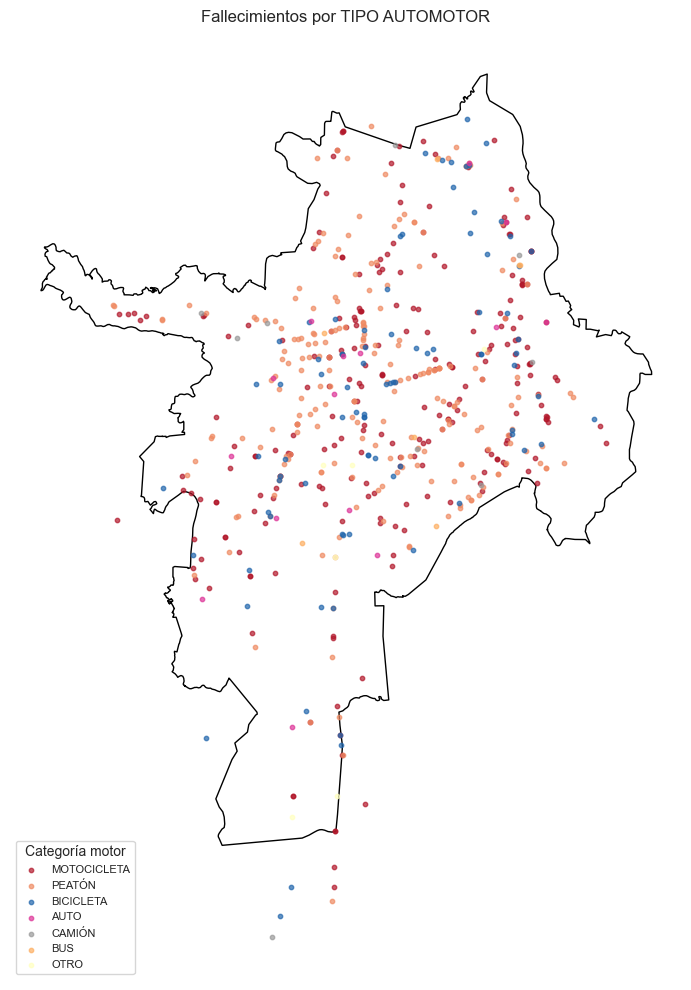

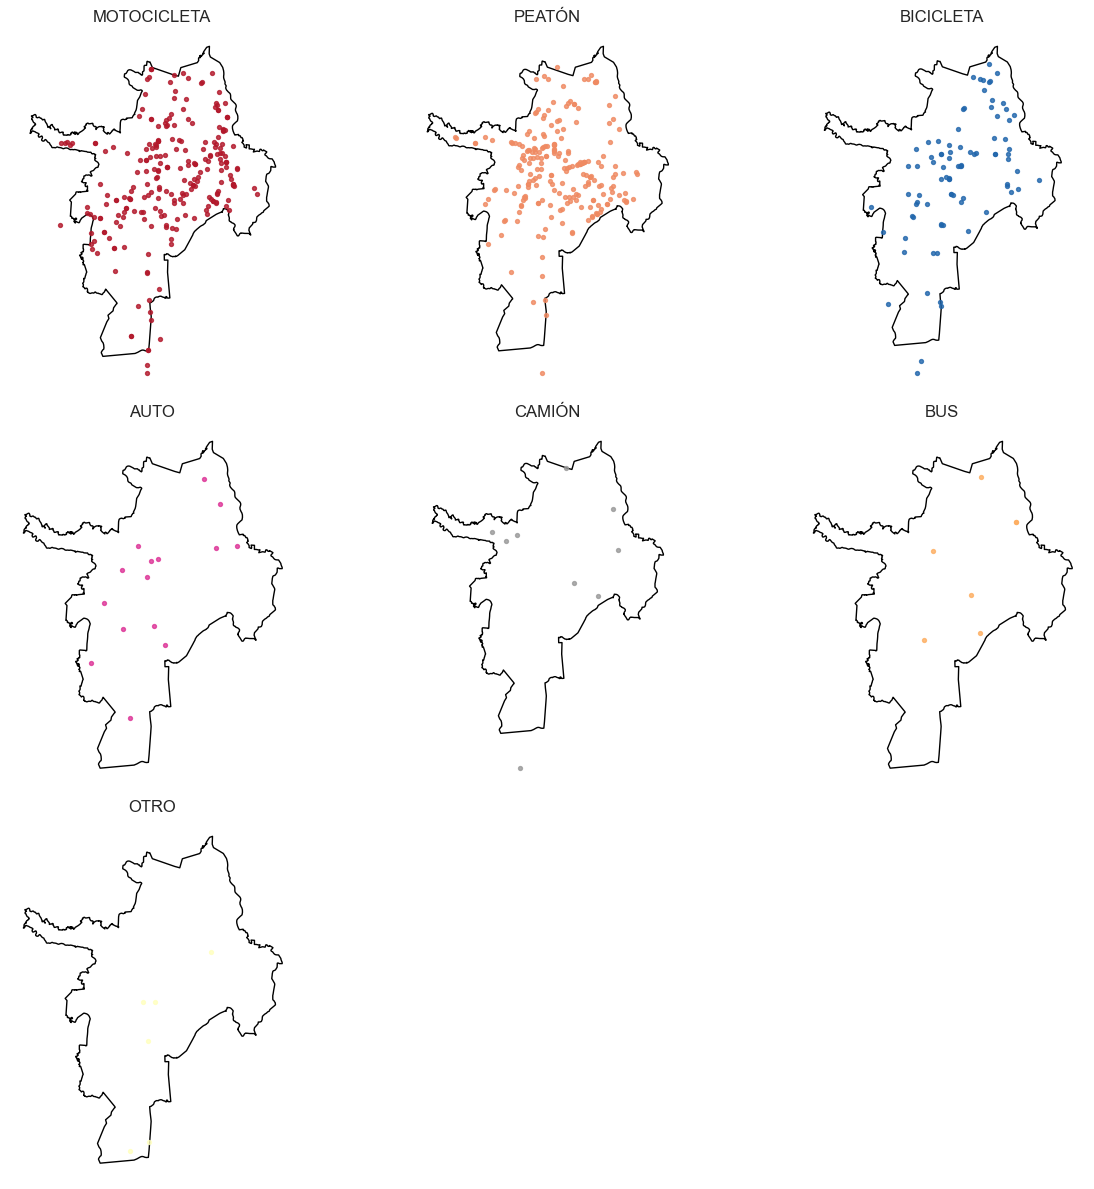

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Orden y paleta (ajústala si quieres)
orden = [
    "MOTOCICLETA",
    "PEATÓN",
    "BICICLETA",
    "AUTO",
    "CAMIÓN",
    "BUS",
    "OTRO",
]
pal = {
    "MOTOCICLETA":   "#b2182b",
    "PEATÓN":  "#ef8a62",
    "BICICLETA":  "#2166ac",
    "AUTO":"#dd3497",
    "CAMIÓN":    "#999999",
    "BUS":  "#fdae61",
    "OTRO": "#ffffbf",
}

# Sanitizar nulos
gdf_pts["TIPO AUTOMOTOR"] = pd.Categorical(gdf_pts["TIPO AUTOMOTOR"], categories=orden, ordered=True)

# --- Variante A: todas las categorías en un solo mapa ---
fig, ax = plt.subplots(figsize=(10,10))
borde_union.plot(ax=ax, facecolor="white", edgecolor="black", linewidth=1)

for cat in [c for c in orden if c in gdf_pts["TIPO AUTOMOTOR"].unique()]:
    sub = gdf_pts[gdf_pts["TIPO AUTOMOTOR"] == cat]
    if len(sub) == 0: 
        continue
    sub.plot(ax=ax, markersize=10, alpha=0.7, color=pal.get(cat, "#666666"), label=cat)

ax.legend(title="Categoría motor", loc="lower left", fontsize=8)
ax.set_title("Fallecimientos por TIPO AUTOMOTOR")
ax.set_axis_off()
plt.tight_layout(); plt.show()

# --- Variante B: small-multiples (uno por categoría) ---
cats_presentes = [c for c in orden if c in gdf_pts["TIPO AUTOMOTOR"].unique()]
n = len(cats_presentes)
cols = 3
rows = (n + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(12, 4*rows))
axs = axs.ravel()

for i, cat in enumerate(cats_presentes):
    ax = axs[i]
    borde_union.plot(ax=ax, facecolor="white", edgecolor="black", linewidth=1)
    sub = gdf_pts[gdf_pts["TIPO AUTOMOTOR"] == cat]
    sub.plot(ax=ax, markersize=8, alpha=0.8, color=pal.get(cat, "#666666"))
    ax.set_title(cat); ax.set_axis_off()

# ocultar ejes sobrantes
for j in range(i+1, rows*cols):
    axs[j].set_visible(False)

plt.tight_layout(); plt.show()


In [67]:
df['TIPO AUTOMOTOR'].value_counts().head(10)

TIPO AUTOMOTOR
MOTOCICLETA    244
PEATÓN         222
BICICLETA       86
AUTO            15
CAMIÓN           9
BUS              7
OTRO             6
Name: count, dtype: int64

In [68]:
# import matplotlib.pyplot as plt

# tipos = ["MOTOCICLETA", "PEATÓN", "BICICLETA", "AUTO", "CAMIÓN", "BUS", "OTRO"]
# existentes = [t for t in tipos if t in gdf_pts.columns]

# fig, ax = plt.subplots(figsize=(10,10))
# borde_union.plot(ax=ax, facecolor="white", edgecolor="black", linewidth=1)

# for t in existentes:
#     subset = gdf_pts[gdf_pts[t] == True]
#     if len(subset) == 0: 
#         continue
#     subset.plot(ax=ax, markersize=8, alpha=0.7, label=t)

# ax.legend(title="Tipo de vehículo", loc="lower left", fontsize=8)
# ax.set_title("Puntos por tipo de vehículo (capas superpuestas)")
# ax.set_axis_off()
# plt.tight_layout(); plt.show()


In [69]:
pd.crosstab(df['SEXO'], df['TIPO AUTOMOTOR'])


TIPO AUTOMOTOR,AUTO,BICICLETA,BUS,CAMIÓN,MOTOCICLETA,OTRO,PEATÓN
SEXO,,,,,,,
F,1,6,2,2,35,1,66
M,14,80,5,7,209,5,156


<Axes: xlabel='DIA SEMANA ACCIDENTE'>

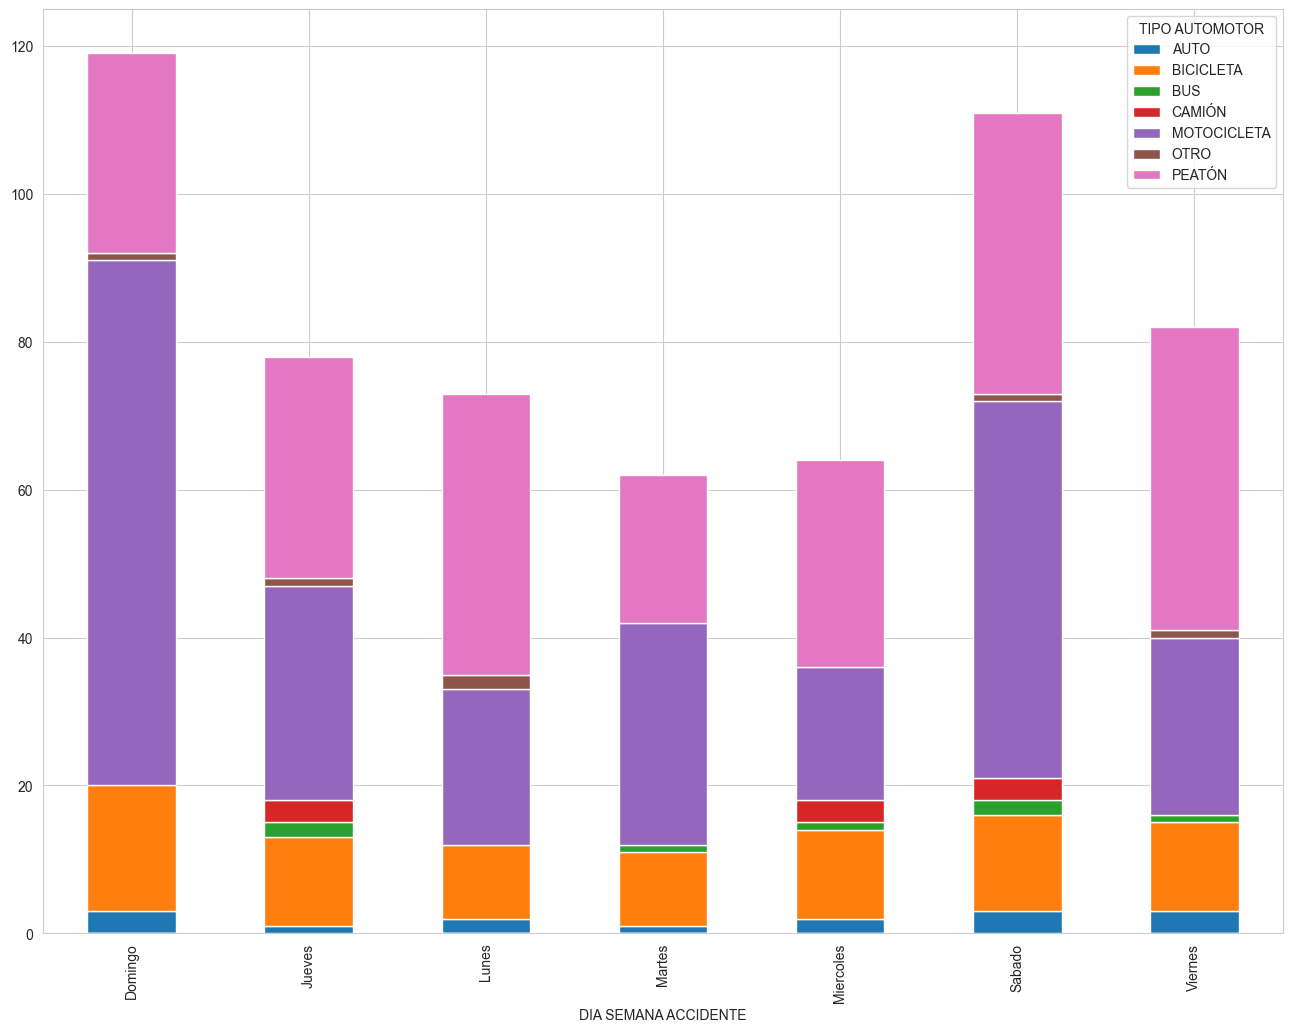

In [70]:
pd.crosstab(df['DIA SEMANA ACCIDENTE'], df['TIPO AUTOMOTOR']).plot(kind="bar", stacked=True)
